# **MACHINE LEARNING TECHNIQUES TO ANALYZE AND PREDICT OVER EXPENDITURE PATTERNS AMONG LOW INCOME HOUSEHOLDS IN SRI LANKA**



## **IMPORT DATASET AND LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Path to the CSV file on Google Drive
file_path = "/content/drive/My Drive/Colab Notebooks/HIESdata.csv"

# Read the dataset
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(6197, 39)

## **DATA PRE PROCESSING**

In [ ]:
# Specify the list of column names that represent categorical variables
categorical_columns = ['district', 'sector', 'month', 'residence', 'relationship',
                        'sex','registration', 'ethnicity', 'religion', 'marital_status',
                        'curr_educ', 'education', 'main_activity', 'is_active',
                        'main_occupation', 'industry', 'employment_status',
                        'hhsize', 'visit_gov_hosp', 'visit_pvt_hosp', 'impatient_gov',
                        'impatient_pvt', 'chronic_illness']

# Convert the specified columns to categorical data type
df[categorical_columns] = df[categorical_columns].astype('category')

In [ ]:
# Creating new Province Variable
df['province'] = df['district'].astype(str).apply(lambda x: x[:2])

# Mapping specific values for provinces
province_mapping = {
    '11': 1, '12': 1, '13': 1, '21': 2, '22': 2, '23': 2, '31': 3, '32': 3, '33': 3, '41': 4, '42': 4, '43': 4, '44': 4,
    '45': 4, '51': 5, '52': 5, '53': 5, '61': 6, '62': 6, '71': 7, '72': 7, '81': 8, '82': 8, '91': 9, '92': 9
}
df['province'] = df['province'].map(province_mapping)

# Combining 2,3,4 categories of the "registration" variable and create one category as 2
df['registration'] = df['registration'].replace([2, 3, 4], 2)

# Combining 5,6,9 categories of the "ethnicity" variable and create one category as 5
df['ethnicity'] = df['ethnicity'].replace([5, 6, 9], 5)

# Combining 5,9 categories of the "religion" variable and create one category as 5
df['religion'] = df['religion'].replace([5, 9], 5)

# Convert 'Marital Status' to integer type
df['marital_status'] = df['marital_status'].astype(int)

# Replace values
df['marital_status'] = df['marital_status'].replace([2, 3], 2)
df['marital_status'] = df['marital_status'].replace([4, 5, 6, 7], 3)

# Convert 'Marital Status' back to category type
df['marital_status'] = df['marital_status'].astype('category')

# Convert 'curr_educ' to integer type
df['curr_educ'] = df['curr_educ'].astype(int)

# Replace values
df['curr_educ'] = df['curr_educ'].replace([2, 3, 5], 1)
df['curr_educ'] = df['curr_educ'].replace(9, 2)

# Convert 'curr_educ' back to category type
df['curr_educ'] = df['curr_educ'].astype('category')

# Convert 'education' to integer type
df['education'] = df['education'].astype(int)

# Replace values
df['education'] = df['education'].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 18, 19], 1)
df['education'] = df['education'].replace([11, 12], 2)
df['education'] = df['education'].replace([13, 14], 3)
df['education'] = df['education'].replace([15, 16, 17], 4)

# Convert 'education' back to category type
df['education'] = df['education'].astype('category')

# Convert 'main_activity' to integer type
df['main_activity'] = df['main_activity'].astype(int)

# Replace values
df['main_activity'] = df['main_activity'].replace([1, 2, 3], 1)
df['main_activity'] = df['main_activity'].replace([4, 5, 6, 7, 8, 9, 99], 2)

# Convert 'main_activity' back to category type
df['main_activity'] = df['main_activity'].astype('category')

# Convert 'employment_status' to integer type
df['employment_status'] = df['employment_status'].astype(int)

# Replace values
df['employment_status'] = df['employment_status'].replace([1, 2], 1)
df['employment_status'] = df['employment_status'].replace(3, 2)
df['employment_status'] = df['employment_status'].replace(4, 3)
df['employment_status'] = df['employment_status'].replace([5, 6], 4)
df['employment_status'] = df['employment_status'].replace(7, 5)

# Convert 'employment_status' back to category type
df['employment_status'] = df['employment_status'].astype('category')

# Create a new column 'expenditure_status' based on the comparison of 'hhexppm' and 'hhincomepm'
df['expenditure_status'] = (df['hhexppm'] > df['hhincomepm']).astype(int)


## **DROPPING UNNECESSARY VARIABLES**

In [ ]:
# Drop unnecessary columns
columns_to_drop = ['ID','nhh','district','relationship','month', 'psu', 'snumber', 'hhno', 'result', 'person_serial_no', 'birth_year',
                   'birth_month', 'B_year', 'main_occupation', 'industry','haif_income']
df = df.drop(columns=columns_to_drop)

In [ ]:
# Specify the list of column names that represent categorical variables
categorical_columns2 = ['province','expenditure_status']

# Convert the specified columns to categorical data type
df[categorical_columns2] = df[categorical_columns2].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6197 entries, 0 to 6196
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   sector              6197 non-null   category
 1   residence           6197 non-null   category
 2   sex                 6197 non-null   category
 3   age                 6197 non-null   int64   
 4   registration        6197 non-null   category
 5   ethnicity           6197 non-null   category
 6   religion            6197 non-null   category
 7   marital_status      6197 non-null   category
 8   curr_educ           6197 non-null   category
 9   education           6197 non-null   category
 10  main_activity       6197 non-null   category
 11  is_active           6197 non-null   category
 12  employment_status   6197 non-null   category
 13  NoOf_sickPersons    6197 non-null   int64   
 14  hhsize              6197 non-null   category
 15  visit_gov_hosp      6197 non-null   ca

In [ ]:
# Save DataFrame to CSV in Google Drive
#df.to_csv('/content/drive/My Drive/Colab Notebooks/cleaned_data.csv', index=False)

## **SPLITTING THE DATA SET**

In [ ]:
#Splitting the dataset
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
trainset, testset = train_test_split(df, test_size=0.2, random_state=10)

# Print the shapes of the resulting datasets
print("Training set shape:", trainset.shape)
print("Test set shape:",testset.shape)

Training set shape: (4957, 25)
Test set shape: (1240, 25)


In [ ]:
X_train = trainset.drop(columns=['expenditure_status'])
y_train = trainset['expenditure_status']
X_test = testset.drop(columns=['expenditure_status'])
y_test = testset['expenditure_status']

In [ ]:
# Create the df_train DataFrame
df_train = trainset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4957 entries, 1282 to 1289
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   sector              4957 non-null   category
 1   residence           4957 non-null   category
 2   sex                 4957 non-null   category
 3   age                 4957 non-null   int64   
 4   registration        4957 non-null   category
 5   ethnicity           4957 non-null   category
 6   religion            4957 non-null   category
 7   marital_status      4957 non-null   category
 8   curr_educ           4957 non-null   category
 9   education           4957 non-null   category
 10  main_activity       4957 non-null   category
 11  is_active           4957 non-null   category
 12  employment_status   4957 non-null   category
 13  NoOf_sickPersons    4957 non-null   int64   
 14  hhsize              4957 non-null   category
 15  visit_gov_hosp      4957 non-null   cate

In [ ]:
df_train

,sector,residence,sex,age,registration,ethnicity,religion,marital_status,curr_educ,education,...,visit_gov_hosp,visit_pvt_hosp,impatient_gov,impatient_pvt,chronic_illness,hhfoodexppm,hhexppm,hhincomepm,province,expenditure_status
1282,2,1,1,71,1,1,1,2,2,1,...,2,2,2,2,2,12081.4290,25028.621,26741.666,2,0
2121,2,1,1,43,1,1,1,2,2,1,...,1,2,2,2,2,13538.5710,21906.035,28132.857,3,0
5532,2,1,2,68,1,1,1,3,2,1,...,2,2,2,2,2,9180.0000,11790.833,23057.143,8,0
1628,2,1,2,55,1,1,1,3,2,2,...,2,1,1,2,1,18252.8570,39583.434,29568.334,3,1
4292,2,1,2,34,1,1,1,2,2,1,...,2,2,1,2,2,11425.7140,42564.527,19254.762,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,2,1,1,43,1,1,1,3,2,1,...,2,1,1,2,2,13371.4290,27675.469,33357.145,2,0
3441,1,1,1,34,1,4,3,2,2,1,...,2,2,2,2,2,26074.2850,39253.941,34500.000,5,1
1344,2,1,1,59,1,1,1,2,2,1,...,1,2,2,2,1,26730.0000,73825.063,35095.238,2,1
4623,2,1,2,41,1,1,4,3,2,1,...,2,2,2,2,2,25384.2850,35692.461,22900.000,6,1


In [ ]:
# Filter columns based on categorical data type
categorical_columns_train = df_train.select_dtypes(include=['category']).columns.tolist()

# Count the number of categorical variables
num_categorical_variables_train = len(categorical_columns_train)

# Print the number of categorical variables
print("Number of categorical variables in df_train:", num_categorical_variables_train)

# Print the names of the categorical variables
print("Categorical variables in df_train:")
print(categorical_columns_train)


Number of categorical variables in df_train: 20
Categorical variables in df_train:
['sector', 'residence', 'sex', 'registration', 'ethnicity', 'religion', 'marital_status', 'curr_educ', 'education', 'main_activity', 'is_active', 'employment_status', 'hhsize', 'visit_gov_hosp', 'visit_pvt_hosp', 'impatient_gov', 'impatient_pvt', 'chronic_illness', 'province', 'expenditure_status']


In [ ]:
# Descriptive analysis on training set
train_summary_stats = X_train.describe()
print(train_summary_stats)


               age  NoOf_sickPersons   hhfoodexppm        hhexppm  \
count  4957.000000       4957.000000   4957.000000    4957.000000   
mean     53.420617          1.478515  17966.209694   35212.630090   
std      14.557850          0.530917   7129.069376   15072.421698   
min      18.000000          1.000000   1975.714200    3689.142800   
25%      42.000000          1.000000  12852.857000   24463.996000   
50%      54.000000          1.000000  17048.572000   33083.621000   
75%      64.000000          2.000000  22028.572000   43242.434000   
max      97.000000          3.000000  63128.570000  287388.440000   

         hhincomepm  
count   4957.000000  
mean   31962.156173  
std     7265.684394  
min    18504.523000  
25%    25892.857000  
50%    32220.000000  
75%    38166.668000  
max    44428.570000  


## Expenditure Status Distribution

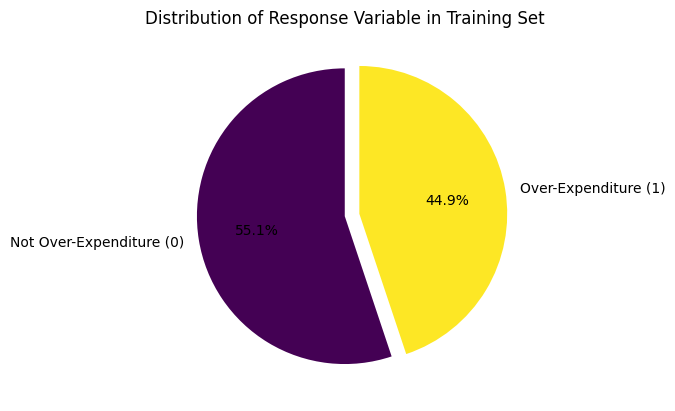

In [ ]:
response_counts_train = df_train['expenditure_status'].value_counts()

# Plotting a pie chart
labels = ['Not Over-Expenditure (0)', 'Over-Expenditure (1)']
colors = plt.cm.viridis(np.linspace(0, 1, 2))  # Using viridis colormap

plt.pie(response_counts_train, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))  # Separating slices
plt.title('Distribution of Response Variable in Training Set')
plt.show()



## Province vs Expenditure Status

<Figure size 1200x800 with 0 Axes>

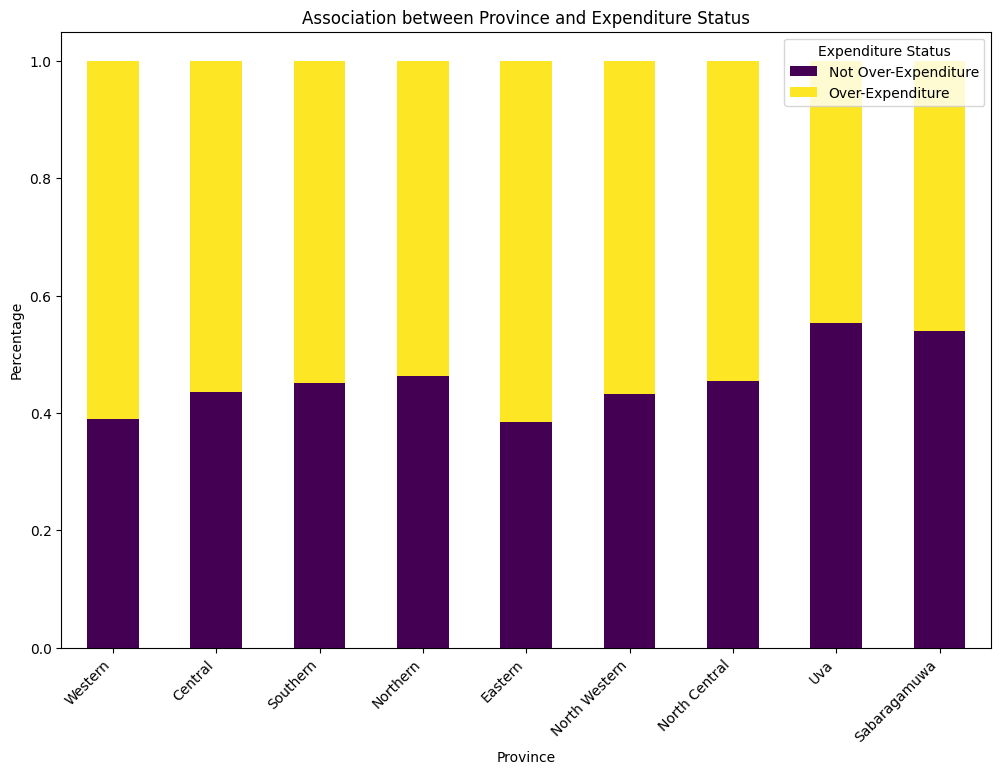

In [ ]:
# Province vs Expenditure Status in Training Set
plt.figure(figsize=(12, 8))

# Combine both categories into a single variable
df_train['combined_status'] = df_train['expenditure_status'].map({0: 'Not Over-Expenditure', 1: 'Over-Expenditure'})

# Calculate percentage of each category within each province
percentage_df_train = (df_train.groupby(['province', 'combined_status']).size() / df_train.groupby('province').size()).reset_index(name='percentage')

# Pivot the DataFrame for easier plotting
pivot_df_train = percentage_df_train.pivot(index='province', columns='combined_status', values='percentage').fillna(0)

# Define province names
province_names = {
    1: 'Western',
    2: 'Central',
    3: 'Southern',
    4: 'Northern',
    5: 'Eastern',
    6: 'North Western',
    7: 'North Central',
    8: 'Uva',
    9: 'Sabaragamuwa'
}

# Create a stacked bar chart
ax = pivot_df_train.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))

# Customize x-axis tick labels
ax.set_xticklabels([province_names[province] for province in pivot_df_train.index], rotation=45, ha='right')

plt.title('Association between Province and Expenditure Status')
plt.xlabel('Province')
plt.ylabel('Percentage')
plt.legend(title='Expenditure Status')

plt.show()

## Sex vs Expenditure Status

<Figure size 600x500 with 0 Axes>

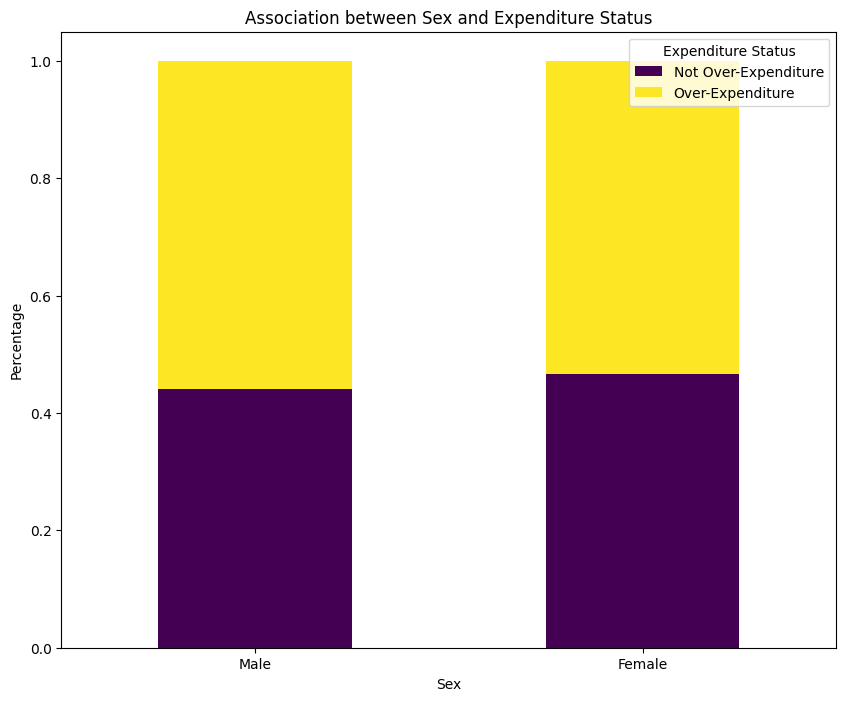

In [ ]:
# Sex vs Expenditure Status
plt.figure(figsize=(6, 5))

# Combine both categories into a single variable
df_train['combined_status'] = df_train['expenditure_status'].map({0: 'Not Over-Expenditure', 1: 'Over-Expenditure'})

# Map sex categories to more descriptive labels
df_train['sex_label'] = df_train['sex'].map({1: 'Male', 2: 'Female'})

# Calculate percentage of each category within each sex
percentage_df_train = (df_train.groupby(['sex_label', 'combined_status']).size() / df_train.groupby('sex_label').size()).reset_index(name='percentage')

# Pivot the DataFrame for easier plotting
pivot_df_train = percentage_df_train.pivot(index='sex_label', columns='combined_status', values='percentage').fillna(0)

# Create a stacked bar chart
ax = pivot_df_train.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 8))

# Customize x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

plt.title('Association between Sex and Expenditure Status')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.legend(title='Expenditure Status')

plt.show()


## Sector vs Expenditure Status

<Figure size 1200x800 with 0 Axes>

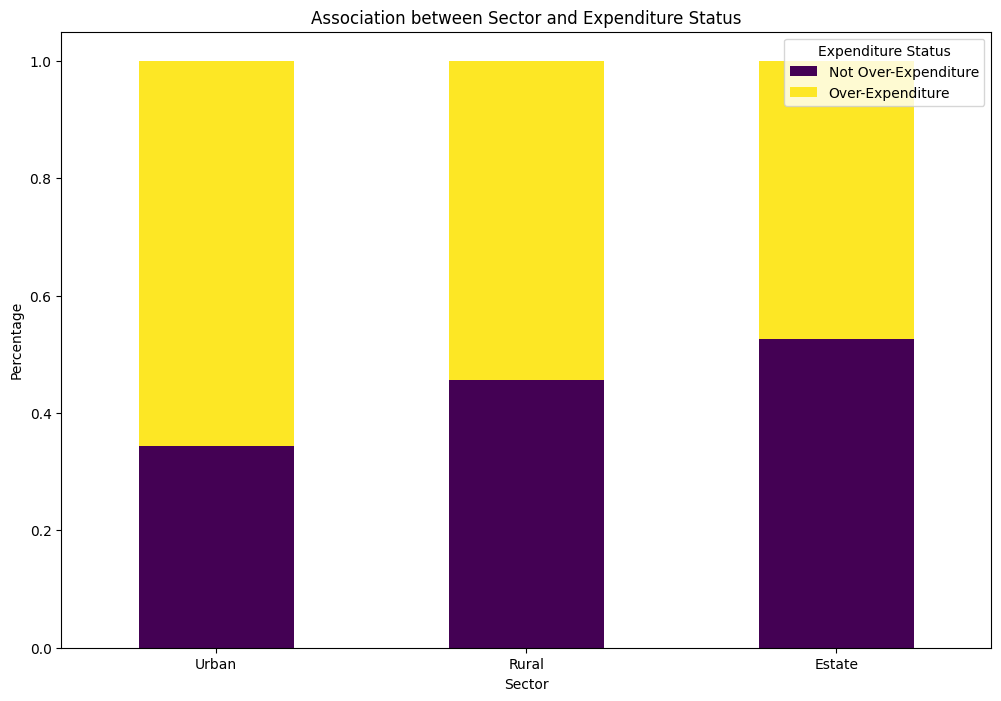

In [ ]:
# Sector vs Expenditure Status in Training Set
plt.figure(figsize=(12, 8))

# Combine both categories into a single variable
df_train['combined_status'] = df_train['expenditure_status'].map({0: 'Not Over-Expenditure', 1: 'Over-Expenditure'})

# Map sector categories to more descriptive labels
sector_labels = {1: 'Urban', 2: 'Rural', 3: 'Estate'}
df_train['sector_label'] = df_train['sector'].map(sector_labels)

# Calculate percentage of each category within each sector
percentage_df_train = (df_train.groupby(['sector_label', 'combined_status']).size() / df_train.groupby('sector_label').size()).reset_index(name='percentage')

# Pivot the DataFrame for easier plotting
pivot_df_train = percentage_df_train.pivot(index='sector_label', columns='combined_status', values='percentage').fillna(0)

# Create a stacked bar chart
ax = pivot_df_train.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))

# Customize x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

plt.title('Association between Sector and Expenditure Status')
plt.xlabel('Sector')
plt.ylabel('Percentage')
plt.legend(title='Expenditure Status')

plt.show()


## Ethnicity vs Expenditure Status

<Figure size 1200x800 with 0 Axes>

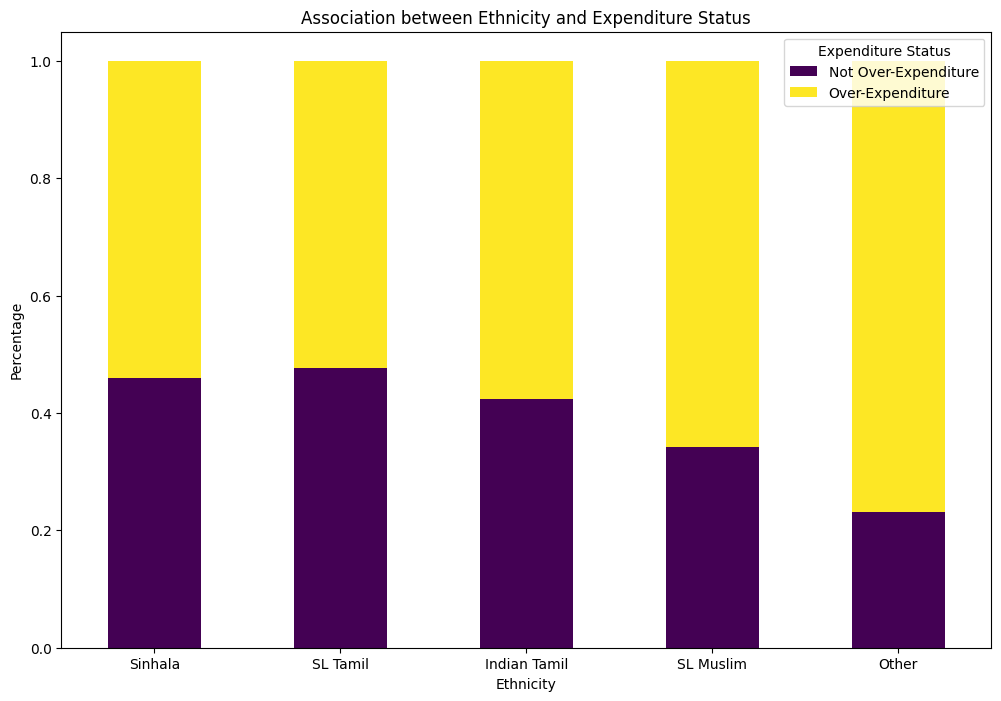

In [ ]:
# Ethnicity vs Expenditure Status in Training Set
plt.figure(figsize=(12, 8))

# Combine both categories into a single variable
df_train['combined_status'] = df_train['expenditure_status'].map({0: 'Not Over-Expenditure', 1: 'Over-Expenditure'})

# Map ethnicity categories to more descriptive labels
ethnicity_labels = {1: 'Sinhala', 2: 'SL Tamil', 3: 'Indian Tamil', 4: 'SL Muslim', 5: 'Other'}
df_train['ethnicity_label'] = df_train['ethnicity'].map(ethnicity_labels)

# Calculate percentage of each category within each ethnicity
percentage_df_train = (df_train.groupby(['ethnicity_label', 'combined_status']).size() / df_train.groupby('ethnicity_label').size()).reset_index(name='percentage')

# Pivot the DataFrame for easier plotting
pivot_df_train = percentage_df_train.pivot(index='ethnicity_label', columns='combined_status', values='percentage').fillna(0)

# Create a stacked bar chart
ax = pivot_df_train.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))

# Customize x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

plt.title('Association between Ethnicity and Expenditure Status')
plt.xlabel('Ethnicity')
plt.ylabel('Percentage')
plt.legend(title='Expenditure Status')

plt.show()


## Religion vs Expenditure Status

<Figure size 1200x800 with 0 Axes>

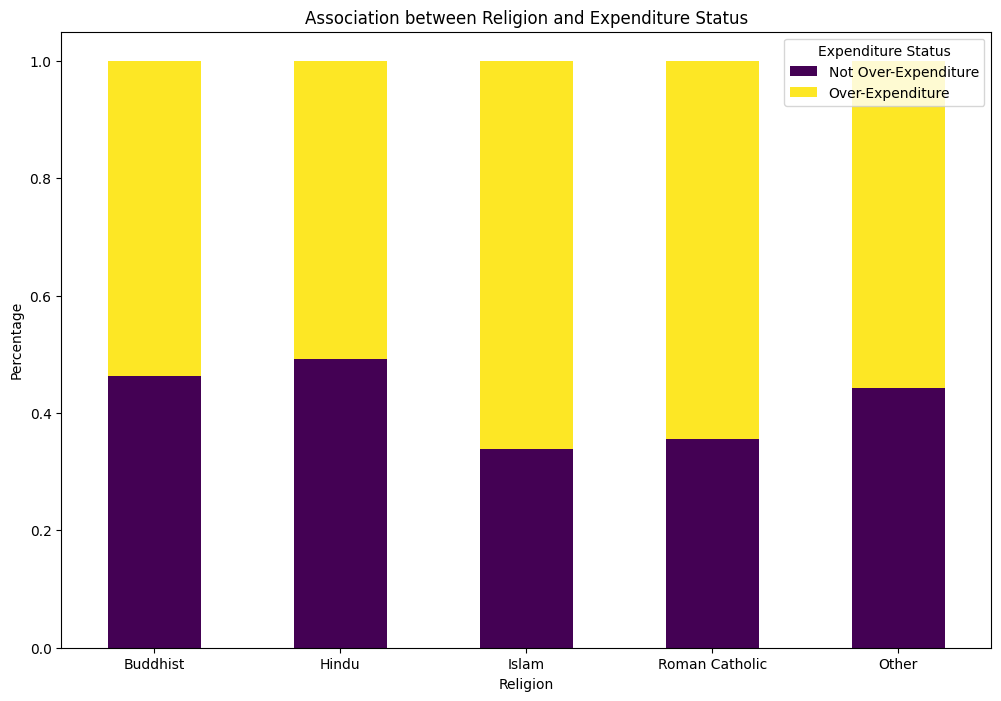

In [ ]:
# Religion vs Expenditure Status in Training Set
plt.figure(figsize=(12, 8))

# Combine both categories into a single variable
df_train['combined_status'] = df_train['expenditure_status'].map({0: 'Not Over-Expenditure', 1: 'Over-Expenditure'})

# Map religion categories to more descriptive labels
religion_labels = {1: 'Buddhist', 2: 'Hindu', 3: 'Islam', 4: 'Roman Catholic', 5: 'Other'}
df_train['religion_label'] = df_train['religion'].map(religion_labels)

# Calculate percentage of each category within each religion
percentage_df_train = (df_train.groupby(['religion_label', 'combined_status']).size() / df_train.groupby('religion_label').size()).reset_index(name='percentage')

# Pivot the DataFrame for easier plotting
pivot_df_train = percentage_df_train.pivot(index='religion_label', columns='combined_status', values='percentage').fillna(0)

# Create a stacked bar chart
ax = pivot_df_train.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))

# Customize x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

plt.title('Association between Religion and Expenditure Status')
plt.xlabel('Religion')
plt.ylabel('Percentage')
plt.legend(title='Expenditure Status')

plt.show()


## Marital Status vs Expenditure Status

<Figure size 1000x800 with 0 Axes>

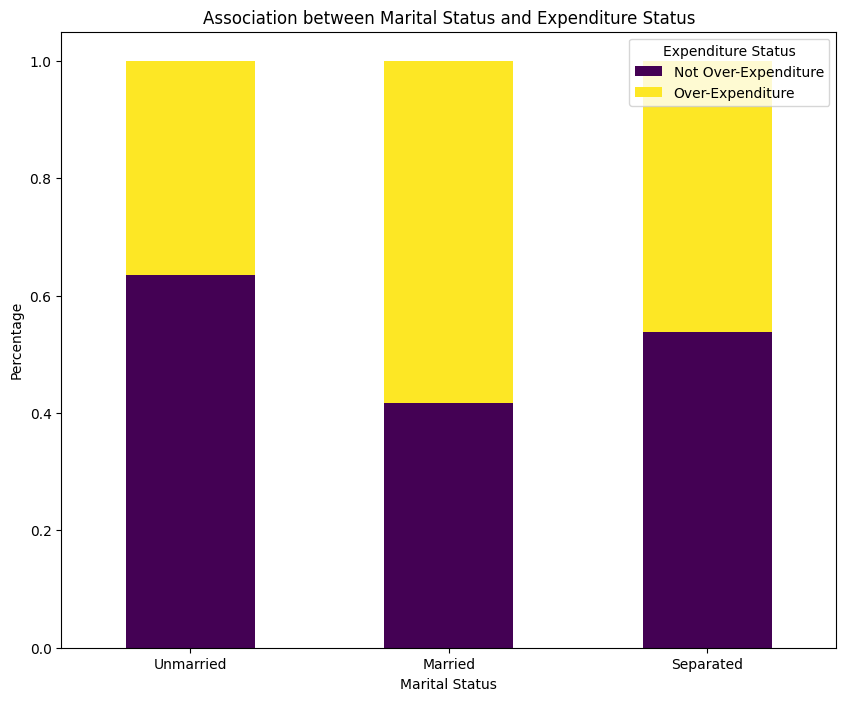

In [ ]:
# Marital Status vs Expenditure Status in Training Set
plt.figure(figsize=(10, 8))

# Combine both categories into a single variable
df_train['combined_status'] = df_train['expenditure_status'].map({0: 'Not Over-Expenditure', 1: 'Over-Expenditure'})

# Map marital status categories to more descriptive labels
marital_status_labels = {1: 'Unmarried', 2: 'Married', 3: 'Separated'}
df_train['marital_status_label'] = df_train['marital_status'].map(marital_status_labels)

# Calculate percentage of each category within each marital status
percentage_df_train = (df_train.groupby(['marital_status_label', 'combined_status']).size() / df_train.groupby('marital_status_label').size()).reset_index(name='percentage')

# Pivot the DataFrame for easier plotting
pivot_df_train = percentage_df_train.pivot(index='marital_status_label', columns='combined_status', values='percentage').fillna(0)

# Create a stacked bar chart
ax = pivot_df_train.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 8))

# Customize x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

plt.title('Association between Marital Status and Expenditure Status')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.legend(title='Expenditure Status')

plt.show()


## Current Education vs Expenditure Status

<Figure size 1000x800 with 0 Axes>

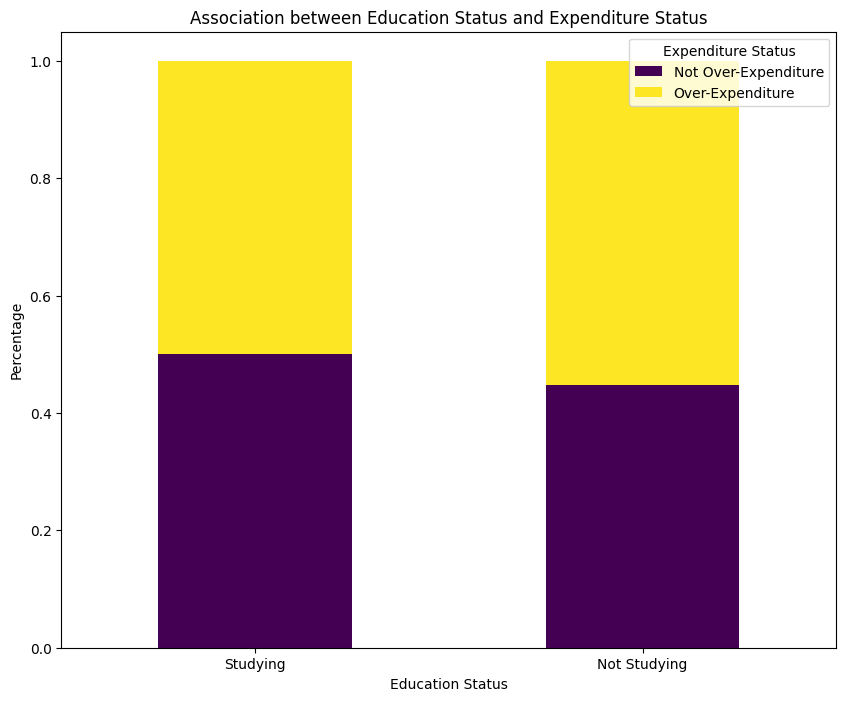

In [ ]:
# Current Education vs Expenditure Status in Training Set
plt.figure(figsize=(10, 8))

# Combine both categories into a single variable
df_train['combined_status'] = df_train['expenditure_status'].map({0: 'Not Over-Expenditure', 1: 'Over-Expenditure'})

# Map education categories to more descriptive labels
education_labels = {1: 'Studying', 2: 'Not Studying'}
df_train['education_label'] = df_train['curr_educ'].map(education_labels)

# Calculate percentage of each category within each education status
percentage_df_train = (df_train.groupby(['education_label', 'combined_status']).size() / df_train.groupby('education_label').size()).reset_index(name='percentage')

# Pivot the DataFrame for easier plotting
pivot_df_train = percentage_df_train.pivot(index='education_label', columns='combined_status', values='percentage').fillna(0)

# Create a stacked bar chart
ax = pivot_df_train.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 8))

# Customize x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

plt.title('Association between Education Status and Expenditure Status')
plt.xlabel('Education Status')
plt.ylabel('Percentage')
plt.legend(title='Expenditure Status')
plt.show()

## Current Education vs Expenditure Status

<Figure size 1000x800 with 0 Axes>

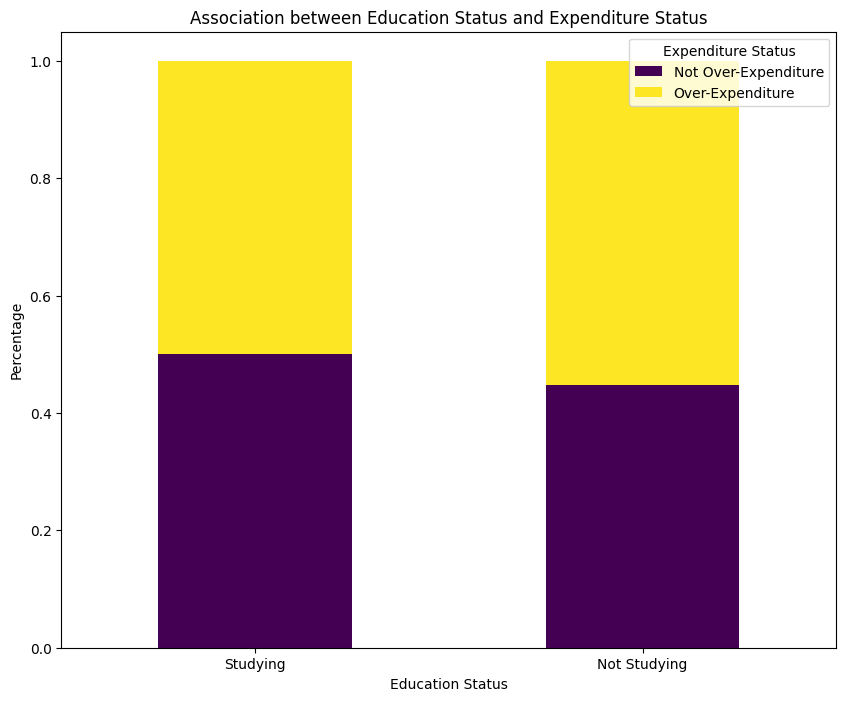

In [ ]:
# Current Education vs Expenditure Status in Training Set
plt.figure(figsize=(10, 8))

# Combine both categories into a single variable
df_train['combined_status'] = df_train['expenditure_status'].map({0: 'Not Over-Expenditure', 1: 'Over-Expenditure'})

# Map education categories to more descriptive labels
education_labels = {1: 'Studying', 2: 'Not Studying'}
df_train['education_label'] = df_train['curr_educ'].map(education_labels)

# Calculate percentage of each category within each education status
percentage_df_train = (df_train.groupby(['education_label', 'combined_status']).size() / df_train.groupby('education_label').size()).reset_index(name='percentage')

# Pivot the DataFrame for easier plotting
pivot_df_train = percentage_df_train.pivot(index='education_label', columns='combined_status', values='percentage').fillna(0)

# Create a stacked bar chart
ax = pivot_df_train.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 8))

# Customize x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

plt.title('Association between Education Status and Expenditure Status')
plt.xlabel('Education Status')
plt.ylabel('Percentage')
plt.legend(title='Expenditure Status')

plt.show()



## Education vs Expenditure Status

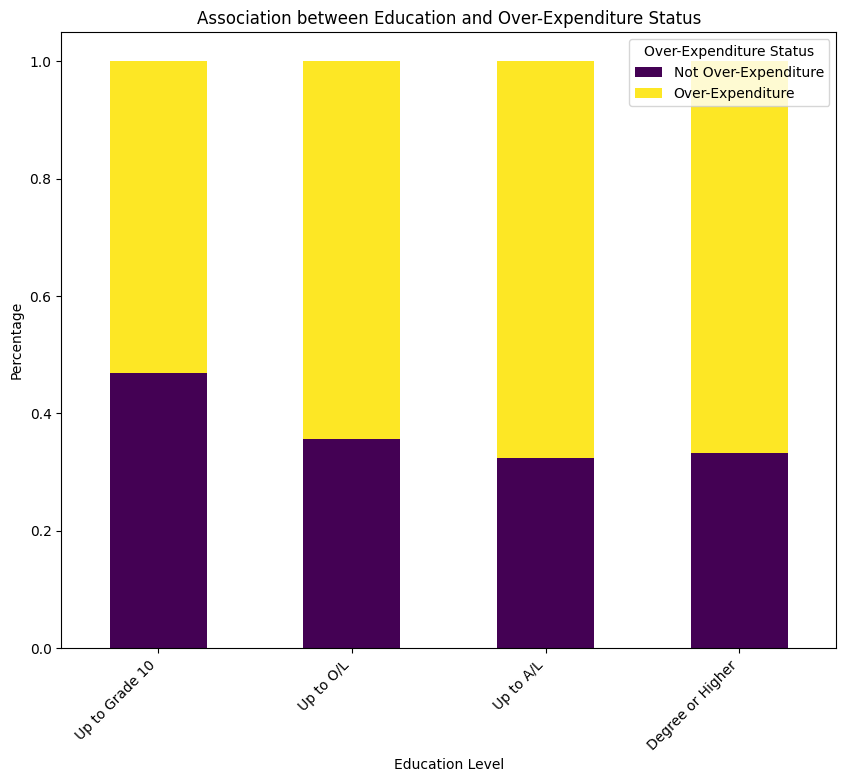

In [ ]:
# Create a copy of the DataFrame to avoid modifying the original data
df_train_copy = df_train.copy()

# Map education categories to more descriptive labels
education_labels = {1: 'Up to Grade 10', 2: 'Up to O/L', 3: 'Up to A/L', 4: 'Degree or Higher'}
df_train_copy['education_label'] = df_train_copy['education'].map(education_labels)

# Create a new column to represent over expenditure status
df_train_copy['over_expenditure'] = df_train_copy['expenditure_status'].map({0: 'Not Over-Expenditure', 1: 'Over-Expenditure'})

# Calculate the percentage of each category within each education status
percentage_df_train = (df_train_copy.groupby(['education_label', 'over_expenditure']).size() / df_train_copy.groupby('education_label').size()).reset_index(name='percentage')

# Pivot the DataFrame for easier plotting
pivot_df_train = percentage_df_train.pivot(index='education_label', columns='over_expenditure', values='percentage').fillna(0)

# Create a stacked bar chart
ax = pivot_df_train.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 8))

# Customize x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.title('Association between Education and Over-Expenditure Status')
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.legend(title='Over-Expenditure Status')

plt.show()


## Main Activity vs Expenditure Status

<Figure size 1000x800 with 0 Axes>

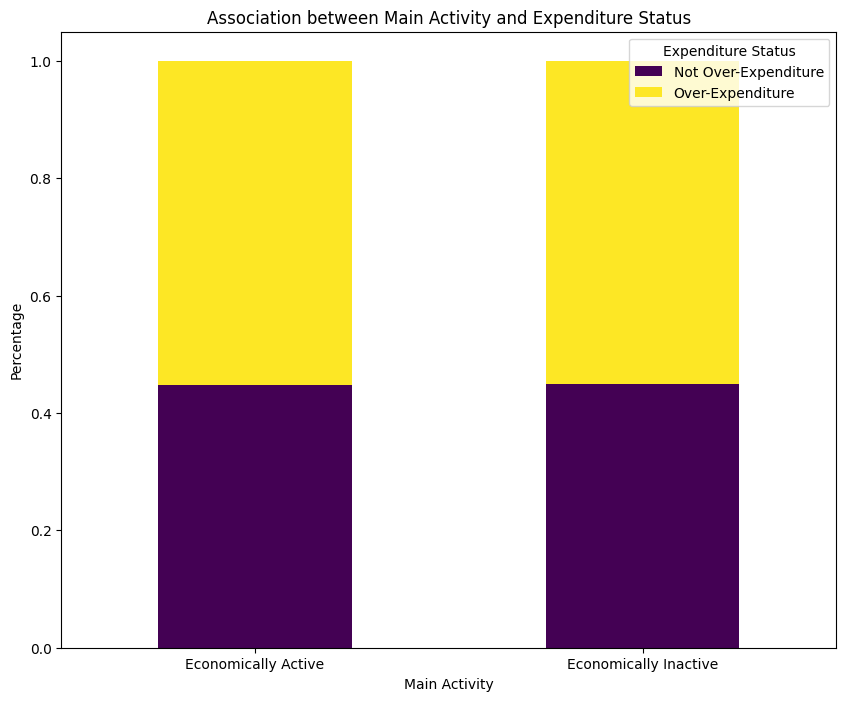

In [ ]:
# Main Activity vs Expenditure Status in Training Set
plt.figure(figsize=(10, 8))

# Combine both categories into a single variable
df_train['combined_status'] = df_train['expenditure_status'].map({0: 'Not Over-Expenditure', 1: 'Over-Expenditure'})

# Map main activity categories to more descriptive labels
activity_labels = {1: 'Economically Active', 2: 'Economically Inactive'}
df_train['activity_label'] = df_train['main_activity'].map(activity_labels)

# Calculate percentage of each category within each main activity
percentage_df_train = (df_train.groupby(['activity_label', 'combined_status']).size() / df_train.groupby('activity_label').size()).reset_index(name='percentage')

# Pivot the DataFrame for easier plotting
pivot_df_train = percentage_df_train.pivot(index='activity_label', columns='combined_status', values='percentage').fillna(0)

# Create a stacked bar chart
ax = pivot_df_train.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 8))

# Customize x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

plt.title('Association between Main Activity and Expenditure Status')
plt.xlabel('Main Activity')
plt.ylabel('Percentage')
plt.legend(title='Expenditure Status')

plt.show()


## Economic Activity vs Expenditure Status

<Figure size 1000x800 with 0 Axes>

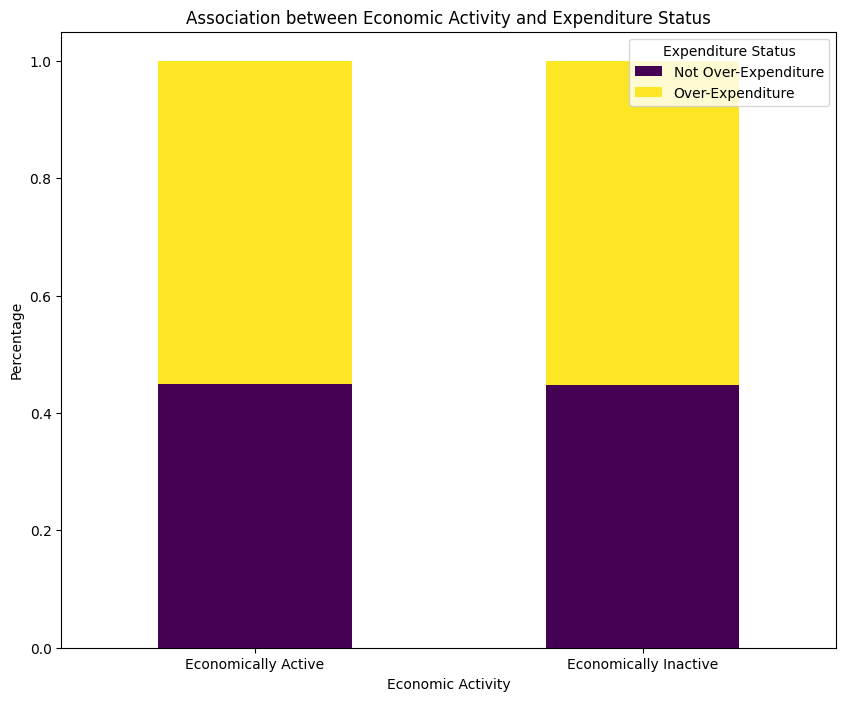

In [ ]:
# Economic Activity vs Expenditure Status in Training Set
plt.figure(figsize=(10, 8))

# Combine both categories into a single variable
df_train['combined_status'] = df_train['expenditure_status'].map({0: 'Not Over-Expenditure', 1: 'Over-Expenditure'})

# Map is_active categories to more descriptive labels
is_active_labels = {1: 'Economically Active', 2: 'Economically Inactive'}
df_train['is_active_label'] = df_train['is_active'].map(is_active_labels)

# Calculate percentage of each category within each is_active status
percentage_df_train = (df_train.groupby(['is_active_label', 'combined_status']).size() / df_train.groupby('is_active_label').size()).reset_index(name='percentage')

# Pivot the DataFrame for easier plotting
pivot_df_train = percentage_df_train.pivot(index='is_active_label', columns='combined_status', values='percentage').fillna(0)

# Create a stacked bar chart
ax = pivot_df_train.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 8))

# Customize x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

plt.title('Association between Economic Activity and Expenditure Status')
plt.xlabel('Economic Activity')
plt.ylabel('Percentage')
plt.legend(title='Expenditure Status')

plt.show()




## Visting Gvt hospital vs Expenditure Status

<Figure size 1000x800 with 0 Axes>

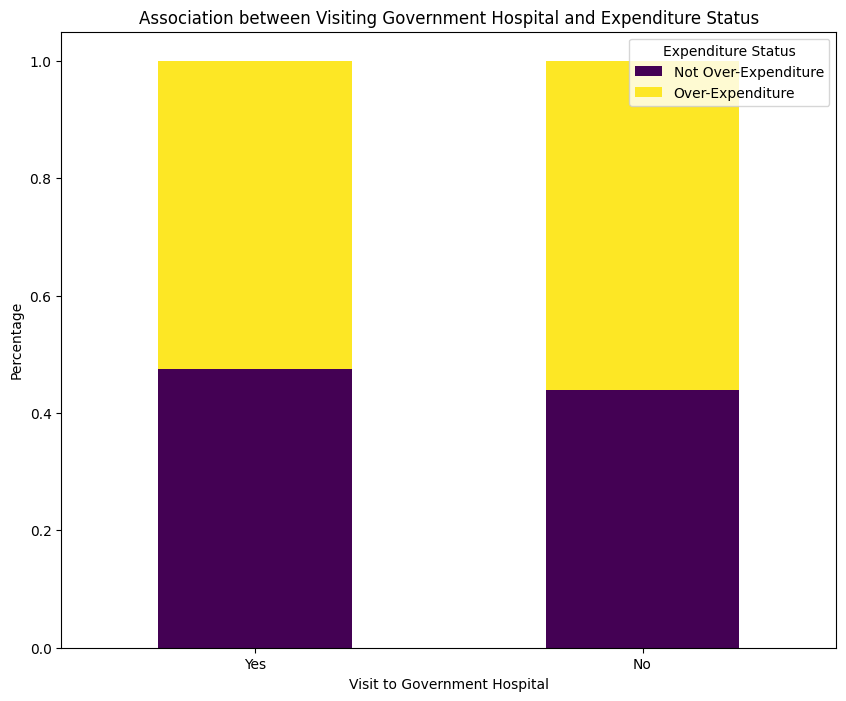

In [ ]:
plt.figure(figsize=(10, 8))

# Combine both categories into a single variable
df_train['combined_status'] = df_train['expenditure_status'].map({0: 'Not Over-Expenditure', 1: 'Over-Expenditure'})

# Map visit_gov_hosp categories to more descriptive labels
visit_labels = {1: 'Yes', 2: 'No'}
df_train['visit_gov_hosp_label'] = df_train['visit_gov_hosp'].map(visit_labels)

# Calculate percentage of each category within each visit_gov_hosp status
percentage_df_train = (df_train.groupby(['visit_gov_hosp_label', 'combined_status']).size() / df_train.groupby('visit_gov_hosp_label').size()).reset_index(name='percentage')

# Pivot the DataFrame for easier plotting
pivot_df_train = percentage_df_train.pivot(index='visit_gov_hosp_label', columns='combined_status', values='percentage').fillna(0)

# Create a stacked bar chart
ax = pivot_df_train.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 8))

# Customize x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

plt.title('Association between Visiting Government Hospital and Expenditure Status')
plt.xlabel('Visit to Government Hospital')
plt.ylabel('Percentage')
plt.legend(title='Expenditure Status')

plt.show()


## Visting PVT hospital vs Expenditure Status

<Figure size 1000x800 with 0 Axes>

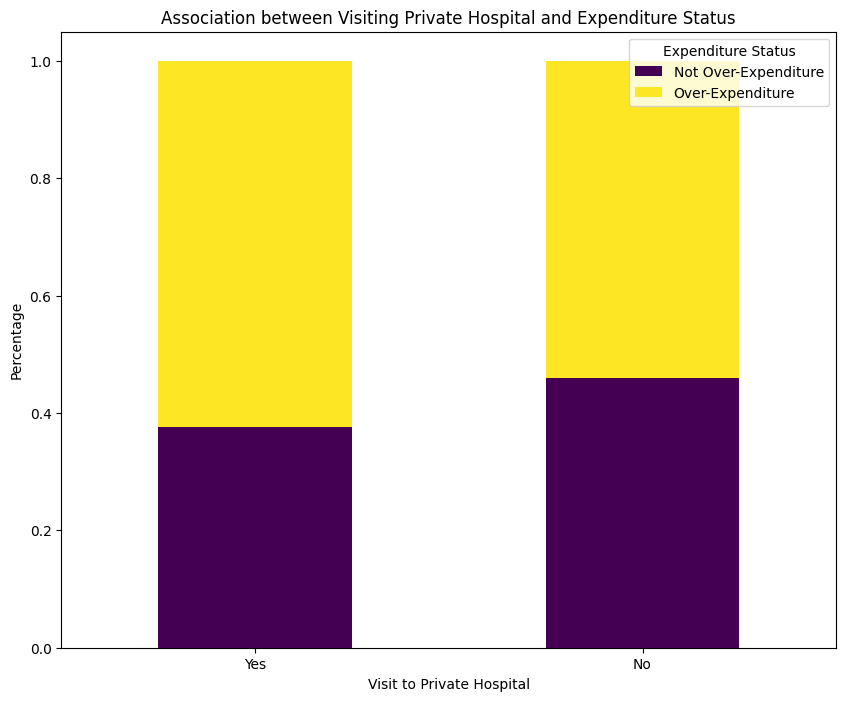

In [ ]:
# Assuming 'df_train' is your DataFrame for the training set
plt.figure(figsize=(10, 8))

# Combine both categories into a single variable
df_train['combined_status'] = df_train['expenditure_status'].map({0: 'Not Over-Expenditure', 1: 'Over-Expenditure'})

# Map visit_pvt_hosp categories to more descriptive labels
visit_labels = {1: 'Yes', 2: 'No'}
df_train['visit_pvt_hosp_label'] = df_train['visit_pvt_hosp'].map(visit_labels)

# Calculate percentage of each category within each visit_pvt_hosp status
percentage_df_train = (df_train.groupby(['visit_pvt_hosp_label', 'combined_status']).size() / df_train.groupby('visit_pvt_hosp_label').size()).reset_index(name='percentage')

# Pivot the DataFrame for easier plotting
pivot_df_train = percentage_df_train.pivot(index='visit_pvt_hosp_label', columns='combined_status', values='percentage').fillna(0)

# Create a stacked bar chart
ax = pivot_df_train.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 8))

# Customize x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

plt.title('Association between Visiting Private Hospital and Expenditure Status')
plt.xlabel('Visit to Private Hospital')
plt.ylabel('Percentage')
plt.legend(title='Expenditure Status')

plt.show()


## Government Inpatient Visits and Expenditure Status

<Figure size 1000x800 with 0 Axes>

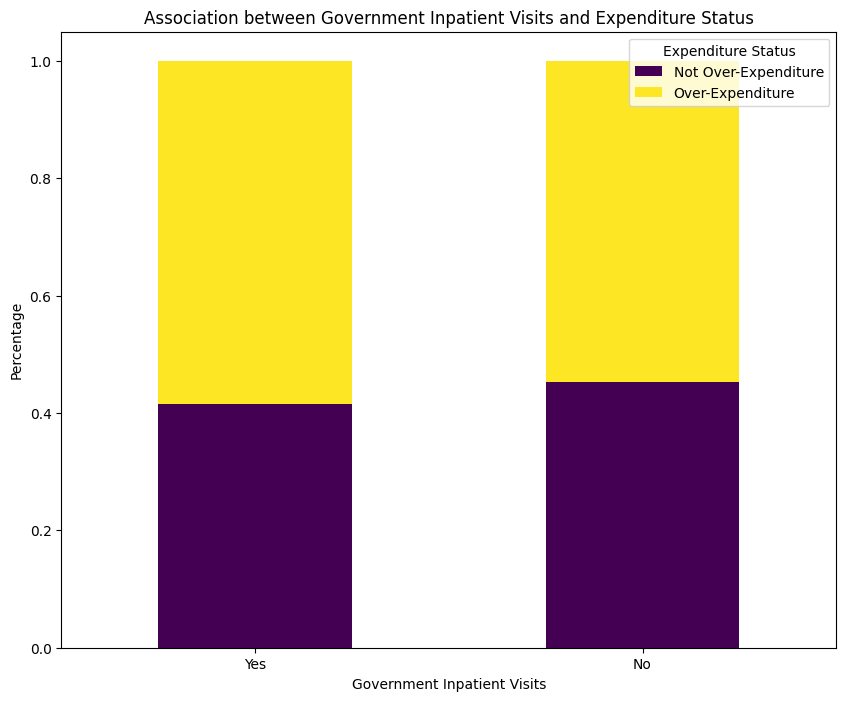

In [ ]:
# Assuming 'df_train' is your DataFrame for the training set
plt.figure(figsize=(10, 8))

# Combine both categories into a single variable
df_train['combined_status'] = df_train['expenditure_status'].map({0: 'Not Over-Expenditure', 1: 'Over-Expenditure'})

# Map impatient_gov categories to more descriptive labels
impatient_labels = {1: 'Yes', 2: 'No'}
df_train['impatient_gov_label'] = df_train['impatient_gov'].map(impatient_labels)

# Calculate percentage of each category within each impatient_gov status
percentage_df_train = (df_train.groupby(['impatient_gov_label', 'combined_status']).size() / df_train.groupby('impatient_gov_label').size()).reset_index(name='percentage')

# Pivot the DataFrame for easier plotting
pivot_df_train = percentage_df_train.pivot(index='impatient_gov_label', columns='combined_status', values='percentage').fillna(0)

# Create a stacked bar chart
ax = pivot_df_train.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 8))

# Customize x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

plt.title('Association between Government Inpatient Visits and Expenditure Status')
plt.xlabel('Government Inpatient Visits')
plt.ylabel('Percentage')
plt.legend(title='Expenditure Status')

plt.show()


## Private Inpatient Visits and Expenditure Status

<Figure size 1000x800 with 0 Axes>

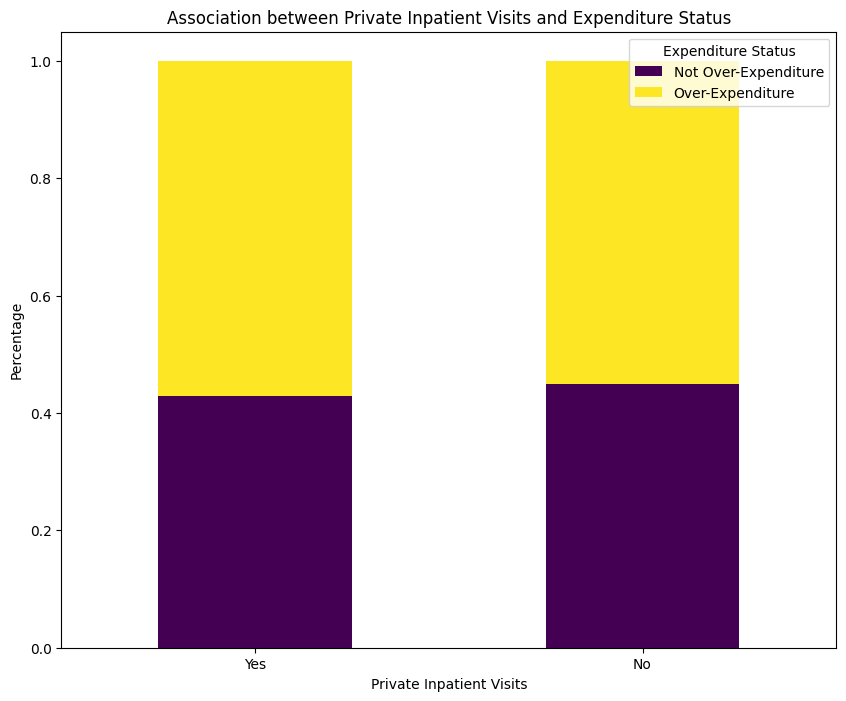

In [ ]:
# Assuming 'df_train' is your DataFrame for the training set
plt.figure(figsize=(10, 8))

# Combine both categories into a single variable
df_train['combined_status'] = df_train['expenditure_status'].map({0: 'Not Over-Expenditure', 1: 'Over-Expenditure'})

# Map impatient_pvt categories to more descriptive labels
impatient_labels = {1: 'Yes', 2: 'No'}
df_train['impatient_pvt_label'] = df_train['impatient_pvt'].map(impatient_labels)

# Calculate percentage of each category within each impatient_pvt status
percentage_df_train = (df_train.groupby(['impatient_pvt_label', 'combined_status']).size() / df_train.groupby('impatient_pvt_label').size()).reset_index(name='percentage')

# Pivot the DataFrame for easier plotting
pivot_df_train = percentage_df_train.pivot(index='impatient_pvt_label', columns='combined_status', values='percentage').fillna(0)

# Create a stacked bar chart
ax = pivot_df_train.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 8))

# Customize x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

plt.title('Association between Private Inpatient Visits and Expenditure Status')
plt.xlabel('Private Inpatient Visits')
plt.ylabel('Percentage')
plt.legend(title='Expenditure Status')

plt.show()


## Chronic Illness and Expenditure Status

<Figure size 1000x800 with 0 Axes>

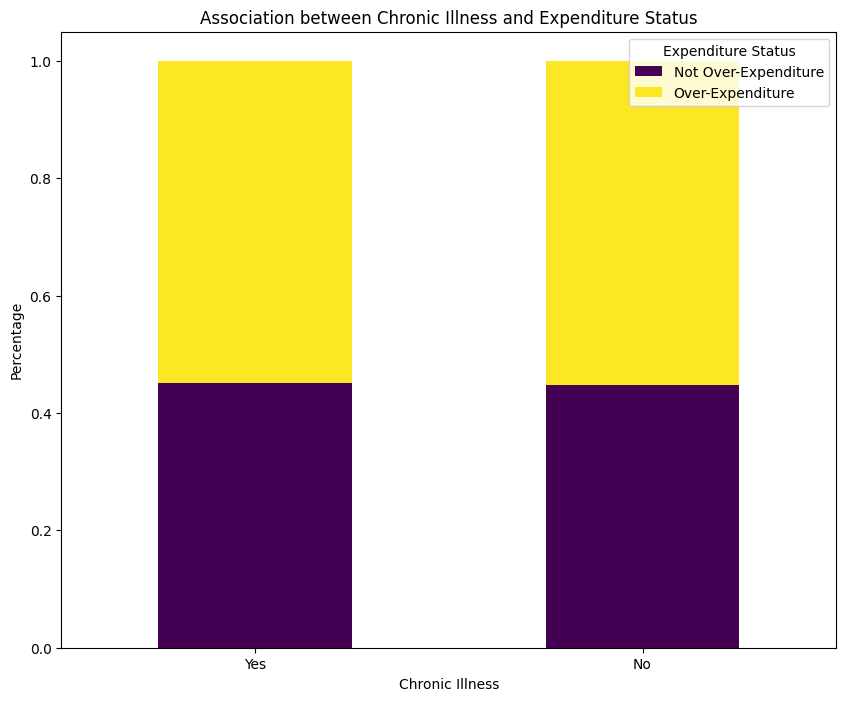

In [ ]:
# Assuming 'df_train' is your DataFrame for the training set
plt.figure(figsize=(10, 8))

# Combine both categories into a single variable
df_train['combined_status'] = df_train['expenditure_status'].map({0: 'Not Over-Expenditure', 1: 'Over-Expenditure'})

# Map chronic_illness categories to more descriptive labels
illness_labels = {1: 'Yes', 2: 'No'}
df_train['chronic_illness_label'] = df_train['chronic_illness'].map(illness_labels)

# Calculate percentage of each category within each chronic_illness status
percentage_df_train = (df_train.groupby(['chronic_illness_label', 'combined_status']).size() / df_train.groupby('chronic_illness_label').size()).reset_index(name='percentage')

# Pivot the DataFrame for easier plotting
pivot_df_train = percentage_df_train.pivot(index='chronic_illness_label', columns='combined_status', values='percentage').fillna(0)

# Create a stacked bar chart
ax = pivot_df_train.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 8))

# Customize x-axis tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

plt.title('Association between Chronic Illness and Expenditure Status')
plt.xlabel('Chronic Illness')
plt.ylabel('Percentage')
plt.legend(title='Expenditure Status')

plt.show()

## Chi Square Tests

In [ ]:
from scipy.stats import chi2_contingency

# Define the significance level
alpha = 0.05

# Select categorical variables
categorical_columns = df.select_dtypes(include=['category']).columns

# Remove the target variable from the list of categorical variables
categorical_columns = categorical_columns.drop('expenditure_status')

# Perform chi-square test for each categorical variable
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['expenditure_status'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test between {col} and expenditure_status:")
    print(f"  Chi2 value: {chi2}")
    print(f"  p-value: {p}")
    if p < alpha:
        print("  There is a significant association between the variables.")
    else:
        print("  There is no significant association between the variables.")


Chi-square test between sector and expenditure_status:
  Chi2 value: 30.10321220055762
  p-value: 2.90516315047247e-07
  There is a significant association between the variables.
Chi-square test between residence and expenditure_status:
  Chi2 value: 0.0
  p-value: 1.0
  There is no significant association between the variables.
Chi-square test between sex and expenditure_status:
  Chi2 value: 1.3839567674923043
  p-value: 0.23942831405581544
  There is no significant association between the variables.
Chi-square test between registration and expenditure_status:
  Chi2 value: 8.089048205100672
  p-value: 0.0044533543852017425
  There is a significant association between the variables.
Chi-square test between ethnicity and expenditure_status:
  Chi2 value: 32.29774221640201
  p-value: 1.6629145180155817e-06
  There is a significant association between the variables.
Chi-square test between religion and expenditure_status:
  Chi2 value: 44.375982033923734
  p-value: 5.359707142847931e-09

## Age by Expenditure Status

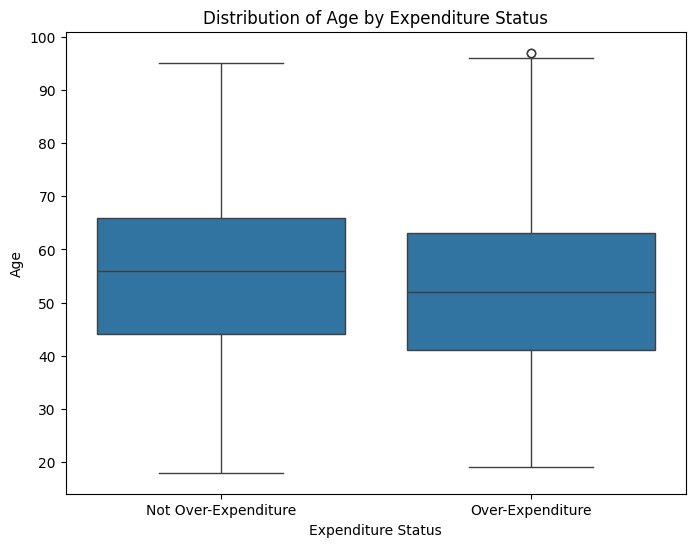

In [ ]:
# Assuming 'df_train' is your DataFrame for the training set
df_train['expenditure_status'] = df_train['expenditure_status'].astype('category')

# Convert 'age' to numeric if it's not already
df_train['age'] = pd.to_numeric(df_train['age'], errors='coerce')

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='expenditure_status', y='age', data=df_train)

# Set x-axis labels
plt.xticks([0, 1], ['Not Over-Expenditure', 'Over-Expenditure'])

plt.xlabel('Expenditure Status')
plt.ylabel('Age')
plt.title('Distribution of Age by Expenditure Status')
plt.show()


In [ ]:
from scipy.stats import mannwhitneyu

# Extract age data for each category
age_not_over_expenditure = df_train[df_train['expenditure_status'] == 0]['age']
age_over_expenditure = df_train[df_train['expenditure_status'] == 1]['age']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(age_not_over_expenditure, age_over_expenditure)

# Print results
print("Mann-Whitney U Test Results:")
print("======================================")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the median age levels of the two categories.")
else:
    print("There is no significant difference between the median age levels of the two categories.")


Mann-Whitney U Test Results:
Statistic: 3410585.0
P-value: 1.22124486604017e-13
There is a significant difference between the median age levels of the two categories.


In [ ]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for 'Not Over-Expenditure'
statistic_not_over, p_value_not_over = shapiro(age_not_over_expenditure)
print("Shapiro-Wilk Test Results for 'Not Over-Expenditure':")
print("======================================================")
print(f"Statistic: {statistic_not_over}")
print(f"P-value: {p_value_not_over}")

# Perform Shapiro-Wilk test for 'Over-Expenditure'
statistic_over, p_value_over = shapiro(age_over_expenditure)
print("\nShapiro-Wilk Test Results for 'Over-Expenditure':")
print("==================================================")
print(f"Statistic: {statistic_over}")
print(f"P-value: {p_value_over}")

# Conclusion section
alpha = 0.05
if p_value_not_over < alpha:
    print("\n'Not Over-Expenditure' category: The data does not follow a normal distribution.")
else:
    print("\n'Not Over-Expenditure' category: The data follows a normal distribution.")

if p_value_over < alpha:
    print("'Over-Expenditure' category: The data does not follow a normal distribution.")
else:
    print("'Over-Expenditure' category: The data follows a normal distribution.")


Shapiro-Wilk Test Results for 'Not Over-Expenditure':
Statistic: 0.9893460273742676
P-value: 8.863540977566142e-12

Shapiro-Wilk Test Results for 'Over-Expenditure':
Statistic: 0.9859673380851746
P-value: 8.460606063704116e-16

'Not Over-Expenditure' category: The data does not follow a normal distribution.
'Over-Expenditure' category: The data does not follow a normal distribution.


In [ ]:
# Extract age data for each category
food_not_over_expenditure = df_train[df_train['expenditure_status'] == 0]['hhfoodexppm']
food_over_expenditure = df_train[df_train['expenditure_status'] == 1]['hhfoodexppm']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(food_not_over_expenditure, food_over_expenditure)

# Print results
print("Mann-Whitney U Test Results:")
print("======================================")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the median food expenditure levels of the two categories.")
else:
    print("There is no significant difference between the median food expenditure levels of the two categories.")


Mann-Whitney U Test Results:
Statistic: 1282033.0
P-value: 2.5541208846996814e-269
There is a significant difference between the median food expenditure levels of the two categories.


In [ ]:
# Extract 'hhfoodexpm' data for each category
food_exp_not_over = df_train[df_train['expenditure_status'] == 0]['hhfoodexppm']
food_exp_over = df_train[df_train['expenditure_status'] == 1]['hhfoodexppm']

# Perform Shapiro-Wilk test for 'Not Over-Expenditure'
statistic_not_over, p_value_not_over = shapiro(food_exp_not_over)
print("Shapiro-Wilk Test Results for 'Not Over-Expenditure' (Household Food Expenditure):")
print("===============================================================================")
print(f"Statistic: {statistic_not_over}")
print(f"P-value: {p_value_not_over}")

# Perform Shapiro-Wilk test for 'Over-Expenditure'
statistic_over, p_value_over = shapiro(food_exp_over)
print("\nShapiro-Wilk Test Results for 'Over-Expenditure' (Household Food Expenditure):")
print("========================================================================")
print(f"Statistic: {statistic_over}")
print(f"P-value: {p_value_over}")

# Conclusion section
alpha = 0.05
if p_value_not_over < alpha:
    print("\n'Not Over-Expenditure' category: The household food expenditure data does not follow a normal distribution.")
else:
    print("\n'Not Over-Expenditure' category: The household food expenditure data follows a normal distribution.")

if p_value_over < alpha:
    print("'Over-Expenditure' category: The household food expenditure data does not follow a normal distribution.")
else:
    print("'Over-Expenditure' category: The household food expenditure data follows a normal distribution.")


Shapiro-Wilk Test Results for 'Not Over-Expenditure' (Household Food Expenditure):
Statistic: 0.9879063963890076
P-value: 9.123677291097976e-13

Shapiro-Wilk Test Results for 'Over-Expenditure' (Household Food Expenditure):
Statistic: 0.9708630442619324
P-value: 3.7335385627142816e-23

'Not Over-Expenditure' category: The household food expenditure data does not follow a normal distribution.
'Over-Expenditure' category: The household food expenditure data does not follow a normal distribution.


In [ ]:
# Perform Shapiro-Wilk test for 'Not Over-Expenditure'
statistic_not_over, p_value_not_over = shapiro(food_not_over_expenditure)
print("Shapiro-Wilk Test Results for 'Not Over-Expenditure':")
print("======================================================")
print(f"Statistic: {statistic_not_over}")
print(f"P-value: {p_value_not_over}")

# Perform Shapiro-Wilk test for 'Over-Expenditure'
statistic_over, p_value_over = shapiro(food_over_expenditure)
print("\nShapiro-Wilk Test Results for 'Over-Expenditure':")
print("==================================================")
print(f"Statistic: {statistic_over}")
print(f"P-value: {p_value_over}")


Shapiro-Wilk Test Results for 'Not Over-Expenditure':
Statistic: 0.9879063963890076
P-value: 9.123677291097976e-13

Shapiro-Wilk Test Results for 'Over-Expenditure':
Statistic: 0.9708630442619324
P-value: 3.7335385627142816e-23


## Number of Sick Persons by Expenditure Status

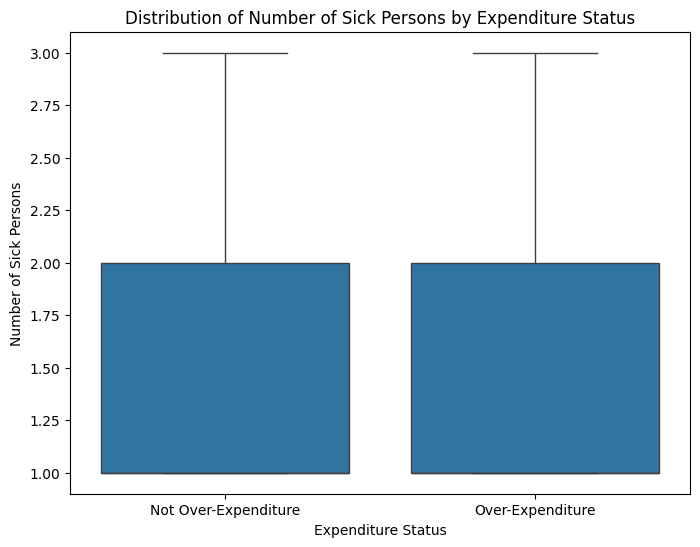

In [ ]:
df_train['expenditure_status'] = df_train['expenditure_status'].astype('category')

# Convert 'NoOf_sickPersons' to numeric if it's not already
df_train['NoOf_sickPersons'] = pd.to_numeric(df_train['NoOf_sickPersons'], errors='coerce')

# Create a box plot for 'NoOf_sickPersons'
plt.figure(figsize=(8, 6))
sns.boxplot(x='expenditure_status', y='NoOf_sickPersons', data=df_train)

# Set x-axis labels
plt.xticks([0, 1], ['Not Over-Expenditure', 'Over-Expenditure'])

plt.xlabel('Expenditure Status')
plt.ylabel('Number of Sick Persons')
plt.title('Distribution of Number of Sick Persons by Expenditure Status')
plt.show()


## Household Food Expenditure per Person by Expenditure Status

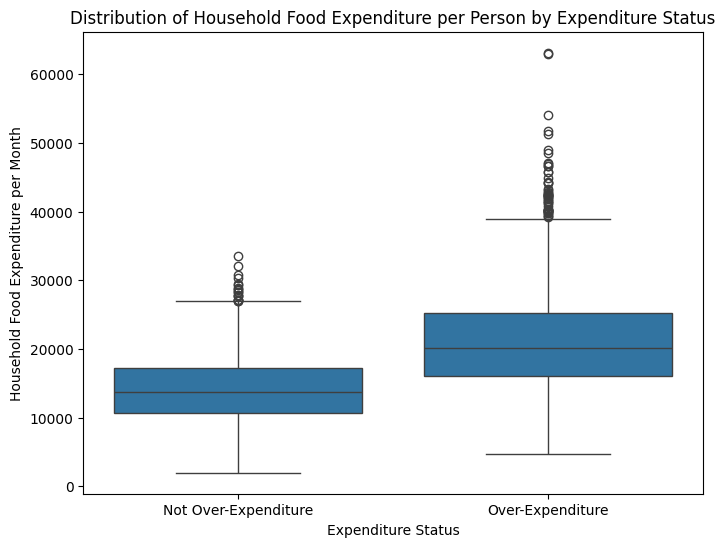

In [ ]:
# Assuming 'df_train' is your DataFrame for the training set
df_train['expenditure_status'] = df_train['expenditure_status'].astype('category')

# Create a box plot for 'hhfoodexppm'
plt.figure(figsize=(8, 6))
sns.boxplot(x='expenditure_status', y='hhfoodexppm', data=df_train)

# Set x-axis labels
plt.xticks([0, 1], ['Not Over-Expenditure', 'Over-Expenditure'])

plt.xlabel('Expenditure Status')
plt.ylabel('Household Food Expenditure per Month')
plt.title('Distribution of Household Food Expenditure per Person by Expenditure Status')
plt.show()


## Correlation Heatmap

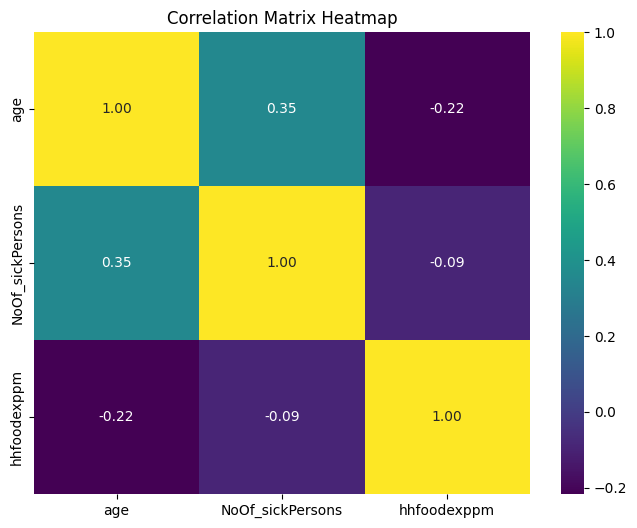

In [ ]:
numerical_columns = ['age', 'NoOf_sickPersons', 'hhfoodexppm']
df_numerical = df_train[numerical_columns]

# Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## MCA

In [ ]:
mca_cols=['sector', 'residence', 'sex', 'registration',
          'ethnicity', 'religion', 'marital_status', 'curr_educ', 'education',
          'main_activity', 'is_active', 'employment_status', 'hhsize', 'visit_gov_hosp',
          'visit_pvt_hosp', 'impatient_gov', 'impatient_pvt', 'chronic_illness', 'province', 'expenditure_status']

In [ ]:
# pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 6.2 MB/s eta 0:00:00


In [ ]:
import prince
# instantiate MCA class
mca = prince.MCA()
mca_data=trainset[mca_cols]
mca_data.head()

# get principal components
mca1 = mca.fit(mca_data)

In [ ]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.193,9.64%,9.64%
1,0.137,6.83%,16.47%


In [ ]:
mca.row_coordinates(mca_data).head()

,0,1
1282,0.362810,-0.034505
2121,-0.266231,-0.327678
5532,0.000237,-0.277856
1628,0.961447,-0.224074
4292,-0.048221,-0.294626


In [ ]:
row_coordinates=mca.row_coordinates(mca_data)
row_coordinates

,0,1
1282,0.362810,-0.034505
2121,-0.266231,-0.327678
5532,0.000237,-0.277856
1628,0.961447,-0.224074
4292,-0.048221,-0.294626
...,...,...
1180,0.014341,-0.258057
3441,-0.528244,0.160119
1344,-0.144719,-0.283403
4623,-0.007081,-0.064811


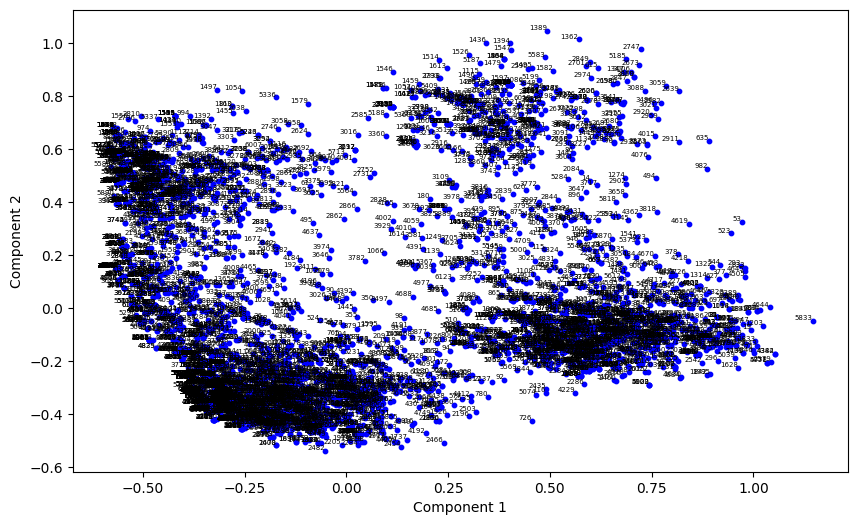

In [ ]:
# Plot column coordinates with labels
plt.figure(figsize=(10, 6))
plt.scatter(row_coordinates[0], row_coordinates[1], marker='o', s=10, color='blue')

# Add labels for each category
for label, x, y in zip(row_coordinates.index, row_coordinates[0], row_coordinates[1]):
    plt.text(x, y, label, fontsize=5, ha='right', va='bottom')

# Add axis labels and title
plt.xlabel('Component 1')
plt.ylabel('Component 2')
#plt.title('Column Coordinates of Categorical Variables')

# Show the plot
#plt.grid()
plt.show()

In [ ]:
mca.column_coordinates(mca_data).head()

,0,1
sector_1,1.594309e-01,4.388705e-01
sector_2,1.354528e-02,-1.703158e-01
sector_3,-4.918806e-01,1.610603e+00
residence_1,-1.691355e-17,-4.987330e-17
sex_1,-3.638457e-01,-9.421195e-02


In [ ]:
column_coordinates=mca.column_coordinates(mca_data)
column_coordinates

,0,1
sector_1,1.594309e-01,4.388705e-01
sector_2,1.354528e-02,-1.703158e-01
sector_3,-4.918806e-01,1.610603e+00
residence_1,-1.691355e-17,-4.987330e-17
sex_1,-3.638457e-01,-9.421195e-02
sex_2,9.516781e-01,2.464216e-01
registration_1,-2.272478e-02,-1.792011e-02
registration_2,9.830497e-01,7.752046e-01
ethnicity_1,2.127344e-01,-6.314255e-01
ethnicity_2,-3.805702e-01,1.495247e+00


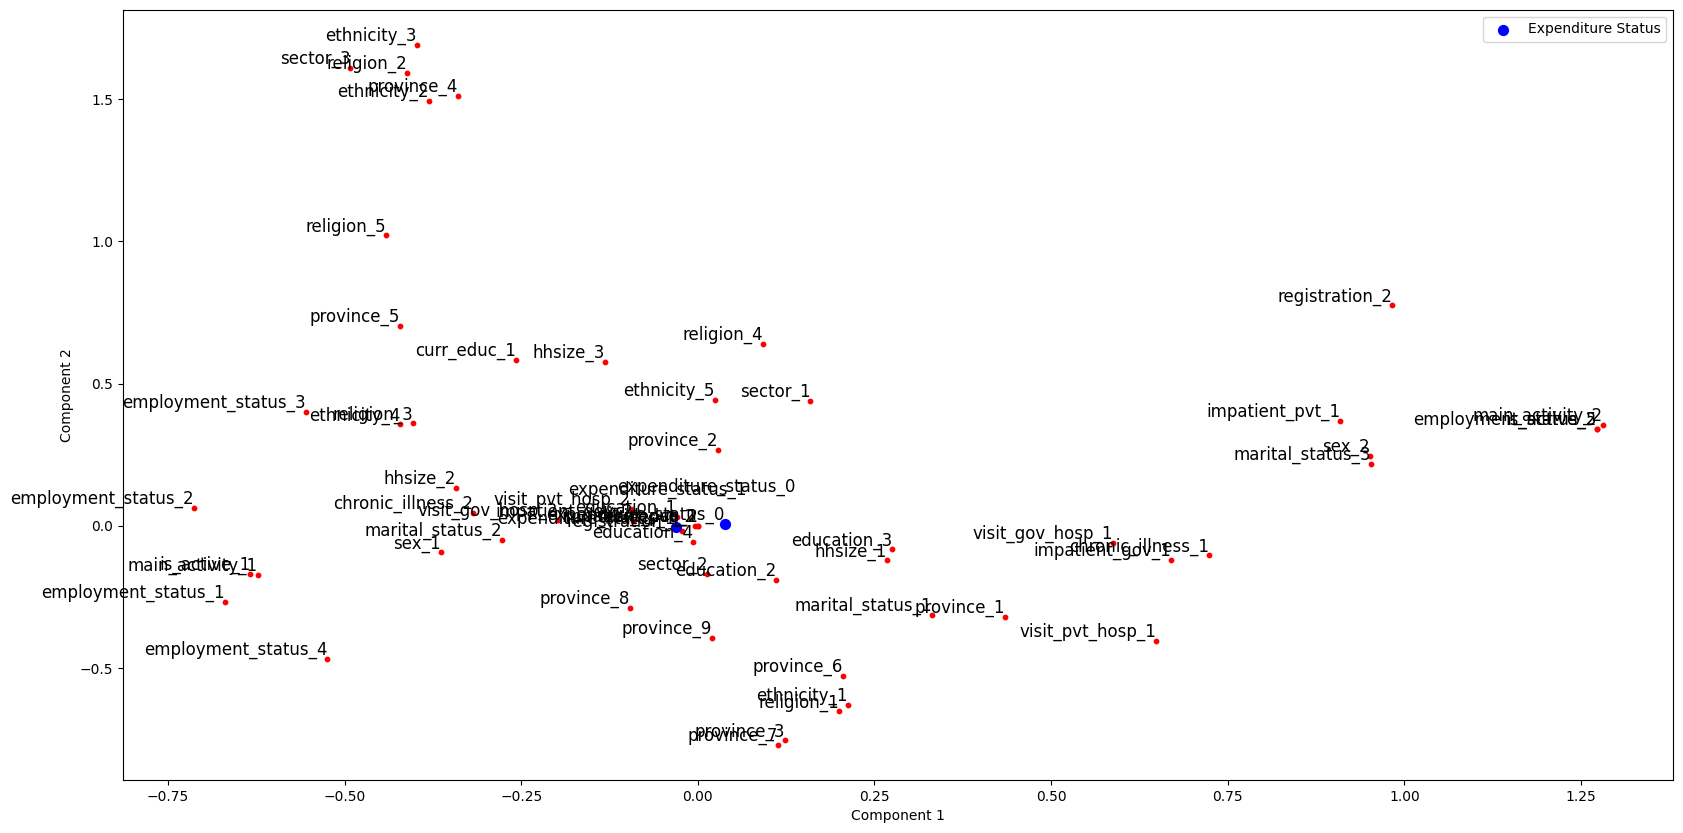

In [ ]:
# Plot column coordinates with labels
plt.figure(figsize=(20, 10))
plt.scatter(column_coordinates[0], column_coordinates[1], marker='o', s=10, color='red')

# Add labels for each category
for label, x, y in zip(column_coordinates.index, column_coordinates[0], column_coordinates[1]):
    plt.text(x, y, label, fontsize=12, ha='right', va='bottom')

# Highlight the 'class' variable's categories with a different color (e.g., blue triangles)
classes_to_highlight = ['expenditure_status_0','expenditure_status_1']
class_coordinates_to_highlight = column_coordinates.loc[classes_to_highlight]
plt.scatter(class_coordinates_to_highlight[0], class_coordinates_to_highlight[1], marker='o', s=50, color='blue', label='Expenditure Status')

# Add labels for the highlighted 'class' variable's categories with some offset
for label, x, y in zip(classes_to_highlight, class_coordinates_to_highlight[0], class_coordinates_to_highlight[1]):
    plt.text(x + 0.1, y + 0.1, label, fontsize=12, ha='right', va='bottom')  # Add offset to position labels

# Add axis labels and title
plt.xlabel('Component 1')
plt.ylabel('Component 2')


# Show the plot
plt.legend()
plt.show()


## FAMD

In [ ]:
trainset_without_class = df_train.drop('expenditure_status', axis=1)
famd = prince.FAMD(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error"
)
famd = famd.fit(trainset_without_class)

In [ ]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,125.949,5.17%,5.17%
1,85.697,3.52%,8.69%


In [ ]:
famd.row_coordinates(trainset_without_class).head()

component,0,1
1282,7.677529,-0.770742
2121,-6.647872,-7.780830
5532,2.152934,-4.940878
1628,24.494725,-3.810561
4292,-2.485406,-5.922769


In [ ]:
famd_row_coordinates=famd.row_coordinates(trainset_without_class)

In [ ]:
famd.column_coordinates_

component,0,1
variable,,
hhfoodexppm,5.262763e-02,8.789059e-03
hhexppm,6.308140e-03,2.677872e-03
hhincomepm,1.048371e-02,7.586916e-04
NoOf_sickPersons,1.712751e-01,1.808926e-02
activity_label,7.345383e-01,7.382924e-02
age,3.500600e-01,3.483726e-02
chronic_illness,3.155742e-01,7.195024e-03
chronic_illness_label,3.155742e-01,7.195024e-03
combined_status,1.250855e-03,7.693137e-04


In [ ]:
famd_column_coordinates=famd.column_coordinates_

In [ ]:
famd.plot(
   df_train,
    x_component=0,
    y_component=1
)

alt.LayerChart(...)

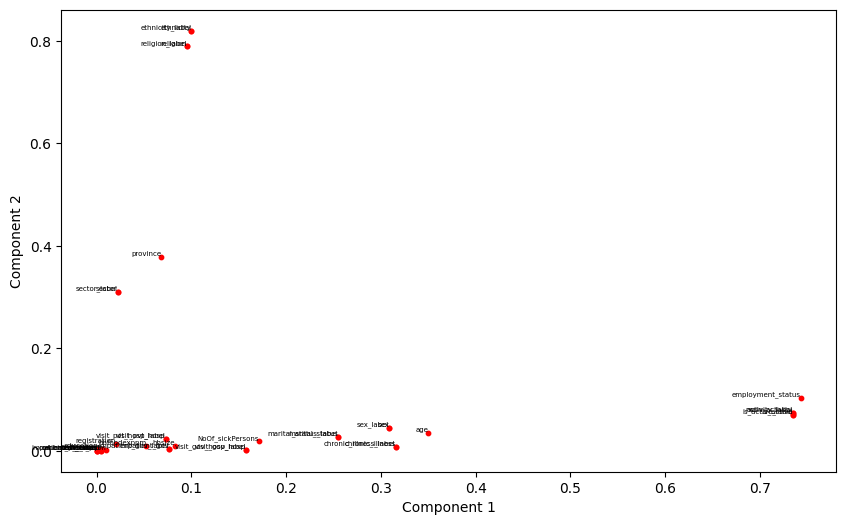

In [ ]:
# Plot column coordinates with labels
plt.figure(figsize=(10, 6))
plt.scatter(famd_column_coordinates[0], famd_column_coordinates[1], marker='o', s=10, color='red')

# Add labels for each category
for label, x, y in zip(famd_column_coordinates.index, famd_column_coordinates[0], famd_column_coordinates[1]):
    plt.text(x, y, label, fontsize=5, ha='right', va='bottom')

# Add axis labels and title
plt.xlabel('Component 1')
plt.ylabel('Component 2')
#plt.title('Column Coordinates of Categorical Variables')

# Show the plot
#plt.grid()
plt.show()

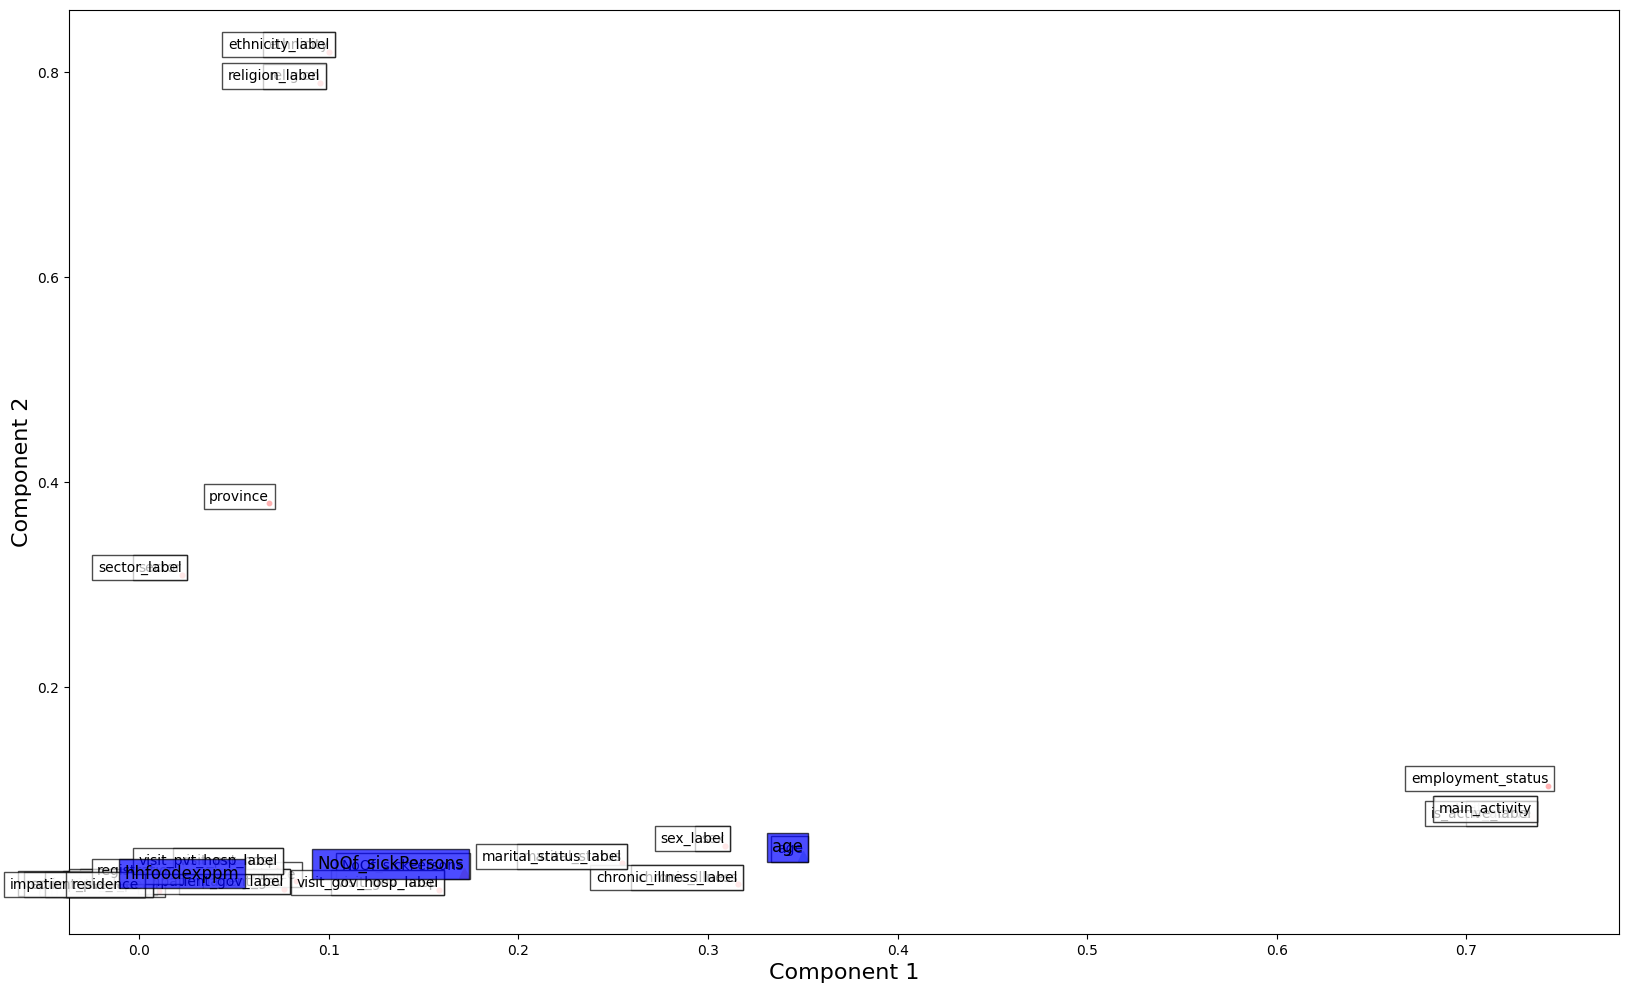

In [ ]:
# Quantitative variables
quantitative_variables = ['age','NoOf_sickPersons','hhfoodexppm']

# Plot column coordinates with labels
plt.figure(figsize=(20, 12))
plt.scatter(famd_column_coordinates[0], famd_column_coordinates[1], marker='o', s=10, color='red')

# Add labels for each category with increased font size and spacing
for label, x, y in zip(famd_column_coordinates.index, famd_column_coordinates[0], famd_column_coordinates[1]):
    plt.text(x, y, label, fontsize=10, ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.7))

# Plot the quantitative variables with a different color or marker
for var in quantitative_variables:
    coordinates = famd_column_coordinates.loc[var]
    plt.scatter(coordinates[0], coordinates[1], marker='^', s=50, label=var)

    # Add labels for the quantitative variables with increased font size and spacing
    plt.text(coordinates[0], coordinates[1], var, fontsize=12, ha='right', va='bottom', bbox=dict(facecolor='blue', alpha=0.7))

# Add axis labels and title with increased font size
plt.xlabel('Component 1', fontsize=16)
plt.ylabel('Component 2', fontsize=16)



# Show the plot
plt.show()


# **ADVANCED ANALYSIS**

## Scaling Numerical Variables

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define the list of numerical columns
numerical_columns = ['age', 'NoOf_sickPersons', 'hhfoodexppm']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the numerical variables separately for both train and test sets
X_train = X_train.copy()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

X_test = X_test.copy()
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Print the shapes of the scaled datasets
print("Shape of X_train_scaled:", X_train.shape)
print("Shape of X_test_scaled:", X_test.shape)


Shape of X_train_scaled: (4957, 24)
Shape of X_test_scaled: (1240, 24)


## One Hot Encoding

In [ ]:
categorical_columnss = ['sector', 'residence', 'sex', 'registration', 'ethnicity', 'religion',
                       'marital_status', 'curr_educ', 'education', 'main_activity', 'is_active', 'employment_status',
                       'hhsize', 'visit_gov_hosp', 'visit_pvt_hosp', 'impatient_gov', 'impatient_pvt', 'chronic_illness',
                     'province']

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the encoder on X_train
X_train_encoded = encoder.fit_transform(X_train[categorical_columnss])

# Transform X_test using the fitted encoder
X_test_encoded = encoder.transform(X_test[categorical_columnss])

# Get the feature names from OneHotEncoder
feature_names_encoded = encoder.get_feature_names_out(categorical_columnss)

# Create new DataFrames for the encoded categorical variables
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=feature_names_encoded)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=feature_names_encoded)

# Reset indices of X_train and X_test
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

# Concatenate the encoded categorical variables with the original numerical variables
X_train = pd.concat([X_train[numerical_columns], X_train_encoded_df], axis=1)
X_test = pd.concat([X_test[numerical_columns], X_test_encoded_df], axis=1)

# Print the shape of the encoded DataFrames
print("Shape of X_train_encoded:", X_train_encoded_df.shape)
print("Shape of X_test_encoded:", X_test_encoded_df.shape)

# Print the shape of the combined datasets
print("Shape of X_train_combined:", X_train.shape)
print("Shape of X_test_combined:", X_test.shape)


Shape of X_train_encoded: (4957, 39)
Shape of X_test_encoded: (1240, 39)
Shape of X_train_combined: (4957, 42)
Shape of X_test_combined: (1240, 42)


## Encoded Categorical Variables

In [ ]:
# Get the feature names for the one-hot encoded categorical features
feature_names_encoded = encoder.get_feature_names_out(categorical_columnss)

# Combine the feature names for numerical and encoded categorical features
feature_names = numerical_columns + list(feature_names_encoded)

# Print the feature names
print("Feature names after encoding:")
print(feature_names)


Feature names after encoding:
['age', 'NoOf_sickPersons', 'hhfoodexppm', 'sector_2', 'sector_3', 'sex_2', 'registration_2', 'ethnicity_2', 'ethnicity_3', 'ethnicity_4', 'ethnicity_5', 'religion_2', 'religion_3', 'religion_4', 'religion_5', 'marital_status_2', 'marital_status_3', 'curr_educ_2', 'education_2', 'education_3', 'education_4', 'main_activity_2', 'is_active_2', 'employment_status_2', 'employment_status_3', 'employment_status_4', 'employment_status_5', 'hhsize_2', 'hhsize_3', 'visit_gov_hosp_2', 'visit_pvt_hosp_2', 'impatient_gov_2', 'impatient_pvt_2', 'chronic_illness_2', 'province_2', 'province_3', 'province_4', 'province_5', 'province_6', 'province_7', 'province_8', 'province_9']


# Model Fitting

## Initial Models

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Logistic Ridge': LogisticRegressionCV(penalty='l2'),
    'Logistic Lasso': LogisticRegressionCV(penalty='l1', solver='liblinear'),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize dictionary to store results
results_train = {}
results_test = {}

# Define metrics to compute
scoring = ['accuracy', 'precision', 'recall', 'f1']

for name, model in models.items():
    # Perform cross-validation on training set
    cv_results_train = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)

    # Extract and store results for training set
    results_train[name] = {
        'accuracy': np.mean(cv_results_train['test_accuracy']),
        'precision': np.mean(cv_results_train['test_precision']),
        'recall': np.mean(cv_results_train['test_recall']),
        'f1': np.mean(cv_results_train['test_f1'])
    }

    # Fit the model to the entire training set
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_test = model.predict(X_test)

    # Compute evaluation metrics for test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)

    # Store results for test set
    results_test[name] = {
        'accuracy': accuracy_test,
        'precision': precision_test,
        'recall': recall_test,
        'f1': f1_test
    }

    # Print results for both training and test sets
    print(f'{name}:')
    print('  Training Set:')
    print(f'    Accuracy: {results_train[name]["accuracy"]:.4f}')
    print(f'    Precision: {results_train[name]["precision"]:.4f}')
    print(f'    Recall: {results_train[name]["recall"]:.4f}')
    print(f'    F1-score: {results_train[name]["f1"]:.4f}')
    print('  Test Set:')
    print(f'    Accuracy: {accuracy_test:.4f}')
    print(f'    Precision: {precision_test:.4f}')
    print(f'    Recall: {recall_test:.4f}')
    print(f'    F1-score: {f1_test:.4f}')


Logistic Regression:
  Training Set:
    Accuracy: 0.7299
    Precision: 0.7535
    Recall: 0.7600
    F1-score: 0.7563
  Test Set:
    Accuracy: 0.7508
    Precision: 0.7826
    Recall: 0.7725
    F1-score: 0.7775
Logistic Ridge:
  Training Set:
    Accuracy: 0.7289
    Precision: 0.7522
    Recall: 0.7600
    F1-score: 0.7557
  Test Set:
    Accuracy: 0.7532
    Precision: 0.7844
    Recall: 0.7754
    F1-score: 0.7799
Logistic Lasso:
  Training Set:
    Accuracy: 0.7285
    Precision: 0.7528
    Recall: 0.7574
    F1-score: 0.7547
  Test Set:
    Accuracy: 0.7516
    Precision: 0.7837
    Recall: 0.7725
    F1-score: 0.7781
Naive Bayes:
  Training Set:
    Accuracy: 0.6331
    Precision: 0.7464
    Recall: 0.5068
    F1-score: 0.6031
  Test Set:
    Accuracy: 0.6113
    Precision: 0.7256
    Recall: 0.4993
    F1-score: 0.5915
Support Vector Machine:
  Training Set:
    Accuracy: 0.7244
    Precision: 0.7418
    Recall: 0.7684
    F1-score: 0.7547
  Test Set:
    Accuracy: 0.7589
  

## Catboost and Light GB

In [ ]:
# pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Logistic Ridge': LogisticRegressionCV(penalty='l2'),
    'Logistic Lasso': LogisticRegressionCV(penalty='l1', solver='liblinear'),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(),  # New: CatBoostClassifier
    'LightGBM': LGBMClassifier()       # New: LGBMClassifier
}

from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize dictionary to store results
results_train = {}
results_test = {}

# Define metrics to compute
scoring = ['accuracy', 'precision', 'recall', 'f1']

for name, model in models.items():
    # Perform cross-validation on training set
    cv_results_train = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)

    # Extract and store results for training set
    results_train[name] = {
        'accuracy': np.mean(cv_results_train['test_accuracy']),
        'precision': np.mean(cv_results_train['test_precision']),
        'recall': np.mean(cv_results_train['test_recall']),
        'f1': np.mean(cv_results_train['test_f1'])
    }

    # Fit the model to the entire training set
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_test = model.predict(X_test)

    # Compute evaluation metrics for test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)

    # Store results for test set
    results_test[name] = {
        'accuracy': accuracy_test,
        'precision': precision_test,
        'recall': recall_test,
        'f1': f1_test
    }

    # Print results for both training and test sets
    print(f'{name}:')
    print('  Training Set:')
    print(f'    Accuracy: {results_train[name]["accuracy"]:.4f}')
    print(f'    Precision: {results_train[name]["precision"]:.4f}')
    print(f'    Recall: {results_train[name]["recall"]:.4f}')
    print(f'    F1-score: {results_train[name]["f1"]:.4f}')
    print('  Test Set:')
    print(f'    Accuracy: {accuracy_test:.4f}')
    print(f'    Precision: {precision_test:.4f}')
    print(f'    Recall: {recall_test:.4f}')
    print(f'    F1-score: {f1_test:.4f}')


## Deep Learning MLP

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

random_seed = 10
# Define the architecture of the MLP
model_mlp = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_mlp.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predictions on training set
mlp_train_preds = (model_mlp.predict(X_train) > 0.5).astype(int)

# Calculate evaluation metrics for training set
mlp_train_accuracy = accuracy_score(y_train, mlp_train_preds)
mlp_train_precision = precision_score(y_train, mlp_train_preds)
mlp_train_recall = recall_score(y_train, mlp_train_preds)
mlp_train_f1 = f1_score(y_train, mlp_train_preds)

# Print evaluation metrics for training set
print("MLP Training Metrics:")
print("Accuracy:", mlp_train_accuracy)
print("Precision:", mlp_train_precision)
print("Recall:", mlp_train_recall)
print("F1 Score:", mlp_train_f1)

# Predictions on test set
mlp_test_preds = (model_mlp.predict(X_test) > 0.5).astype(int)

# Calculate evaluation metrics for test set
mlp_test_accuracy = accuracy_score(y_test, mlp_test_preds)
mlp_test_precision = precision_score(y_test, mlp_test_preds)
mlp_test_recall = recall_score(y_test, mlp_test_preds)
mlp_test_f1 = f1_score(y_test, mlp_test_preds)

# Print evaluation metrics for test set
print("\nMLP Test Metrics:")
print("Accuracy:", mlp_test_accuracy)
print("Precision:", mlp_test_precision)
print("Recall:", mlp_test_recall)
print("F1 Score:", mlp_test_f1)


# Hyper Parameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

## SVM Tuned

In [ ]:
# Define the SVM model
svm_model = SVC()

# Define hyperparameters to tune
param_grid_svm = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf']}

# Perform grid search cross-validation
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')

# Fit grid search on training data
grid_search_svm.fit(X_train, y_train)

# Best parameters found
print("Best Parameters for SVM:", grid_search_svm.best_params_)

# Predictions on training set
svm_train_preds = grid_search_svm.predict(X_train)

# Calculate metrics for training set
svm_train_accuracy = accuracy_score(y_train, svm_train_preds)
svm_train_precision = precision_score(y_train, svm_train_preds)
svm_train_recall = recall_score(y_train, svm_train_preds)
svm_train_f1 = f1_score(y_train, svm_train_preds)

# Print metrics for training set
print("SVM Training Metrics:")
print("Accuracy:", svm_train_accuracy)
print("Precision:", svm_train_precision)
print("Recall:", svm_train_recall)
print("F1 Score:", svm_train_f1)

# Predictions on test set
svm_test_preds = grid_search_svm.predict(X_test)

# Calculate metrics for test set
svm_test_accuracy = accuracy_score(y_test, svm_test_preds)
svm_test_precision = precision_score(y_test, svm_test_preds)
svm_test_recall = recall_score(y_test, svm_test_preds)
svm_test_f1 = f1_score(y_test, svm_test_preds)

# Print metrics for test set
print("\nSVM Test Metrics:")
print("Accuracy:", svm_test_accuracy)
print("Precision:", svm_test_precision)
print("Recall:", svm_test_recall)
print("F1 Score:", svm_test_f1)


## RF Tuned

In [ ]:
# Define the Random Forest model
rf_model = RandomForestClassifier()

# Define hyperparameters to tune
param_grid_rf = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# Perform grid search cross-validation
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')

# Fit grid search on training data
grid_search_rf.fit(X_train, y_train)

# Best parameters found
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Predictions on training set
rf_train_preds = grid_search_rf.predict(X_train)

# Calculate metrics for training set
rf_train_accuracy = accuracy_score(y_train, rf_train_preds)
rf_train_precision = precision_score(y_train, rf_train_preds)
rf_train_recall = recall_score(y_train, rf_train_preds)
rf_train_f1 = f1_score(y_train, rf_train_preds)

# Print metrics for training set
print("Random Forest Training Metrics:")
print("Accuracy:", rf_train_accuracy)
print("Precision:", rf_train_precision)
print("Recall:", rf_train_recall)
print("F1 Score:", rf_train_f1)

# Predictions on test set
rf_test_preds = grid_search_rf.predict(X_test)

# Calculate metrics for test set
rf_test_accuracy = accuracy_score(y_test, rf_test_preds)
rf_test_precision = precision_score(y_test, rf_test_preds)
rf_test_recall = recall_score(y_test, rf_test_preds)
rf_test_f1 = f1_score(y_test, rf_test_preds)

# Print metrics for test set
print("\nRandom Forest Test Metrics:")
print("Accuracy:", rf_test_accuracy)
print("Precision:", rf_test_precision)
print("Recall:", rf_test_recall)
print("F1 Score:", rf_test_f1)


## GB tuned

In [ ]:
# Define the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 4, 5],  # Maximum depth of the individual estimators
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize GridSearchCV
grid_search = GridSearchCV(gradient_boosting, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best parameters to initialize the Gradient Boosting Classifier
best_gradient_boosting = GradientBoostingClassifier(**best_params)

# Fit the model to the entire training set
best_gradient_boosting.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = best_gradient_boosting.predict(X_train)

# Compute evaluation metrics for training set
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Print the evaluation metrics for the training set
print('Gradient Boosting with Hyperparameter Tuning:')
print('  Training Set:')
print(f'    Accuracy: {accuracy_train:.4f}')
print(f'    Precision: {precision_train:.4f}')
print(f'    Recall: {recall_train:.4f}')
print(f'    F1-score: {f1_train:.4f}')

# Make predictions on the test set
y_pred_test = best_gradient_boosting.predict(X_test)

# Compute evaluation metrics for test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Print the evaluation metrics for the test set
print('  Test Set:')
print(f'    Accuracy: {accuracy_test:.4f}')
print(f'    Precision: {precision_test:.4f}')
print(f'    Recall: {recall_test:.4f}')
print(f'    F1-score: {f1_test:.4f}')


## XG Boost Tuned

In [ ]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'n_estimators': [100, 200, 300]
}

# Initialize the XGBoost model
xgb_model = XGBClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Use the best model to make predictions on the training set
y_pred_train = best_model.predict(X_train)

# Compute evaluation metrics for the best model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Print evaluation metrics for the best model on the training set
print('Training Set Results:')
print(f'  Accuracy: {accuracy_train:.4f}')
print(f'  Precision: {precision_train:.4f}')
print(f'  Recall: {recall_train:.4f}')
print(f'  F1-score: {f1_train:.4f}')

# Use the best model to make predictions on the test set
y_pred_test = best_model.predict(X_test)

# Compute evaluation metrics for the best model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Print evaluation metrics for the best model on the test set
print('Test Set Results:')
print(f'  Accuracy: {accuracy_test:.4f}')
print(f'  Precision: {precision_test:.4f}')
print(f'  Recall: {recall_test:.4f}')
print(f'  F1-score: {f1_test:.4f}')


## CatBoost Tuned

In [ ]:
# Define the CatBoost model
catboost_model = CatBoostClassifier()

# Define hyperparameters to tune for CatBoost
param_grid_catboost = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
}

# Perform grid search cross-validation for CatBoost
grid_search_catboost = GridSearchCV(catboost_model, param_grid_catboost, cv=5, scoring='accuracy')

# Fit grid search on training data for CatBoost
grid_search_catboost.fit(X_train, y_train)

# Best parameters found for CatBoost
print("Best Parameters for CatBoost:", grid_search_catboost.best_params_)

# Use the best parameters to initialize the CatBoost Classifier
best_catboost_model = CatBoostClassifier(**grid_search_catboost.best_params_)

# Fit the model to the entire training set
best_catboost_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train_catboost = best_catboost_model.predict(X_train)

# Compute evaluation metrics for training set
accuracy_train_catboost = accuracy_score(y_train, y_pred_train_catboost)
precision_train_catboost = precision_score(y_train, y_pred_train_catboost)
recall_train_catboost = recall_score(y_train, y_pred_train_catboost)
f1_train_catboost = f1_score(y_train, y_pred_train_catboost)

# Print the evaluation metrics for the training set
print('CatBoost Training Metrics:')
print('  Accuracy:', accuracy_train_catboost)
print('  Precision:', precision_train_catboost)
print('  Recall:', recall_train_catboost)
print('  F1 Score:', f1_train_catboost)

# Make predictions on the test set
y_pred_test_catboost = best_catboost_model.predict(X_test)

# Compute evaluation metrics for test set
accuracy_test_catboost = accuracy_score(y_test, y_pred_test_catboost)
precision_test_catboost = precision_score(y_test, y_pred_test_catboost)
recall_test_catboost = recall_score(y_test, y_pred_test_catboost)
f1_test_catboost = f1_score(y_test, y_pred_test_catboost)

# Print the evaluation metrics for the test set
print('CatBoost Testing Metrics:')
print('  Accuracy:', accuracy_test_catboost)
print('  Precision:', precision_test_catboost)
print('  Recall:', recall_test_catboost)
print('  F1 Score:', f1_test_catboost)


In [ ]:
grid_search_catboost.best_params_

## Light GBM Tuned

In [ ]:
# Define the LightGBM model
lgbm_model = LGBMClassifier()

# Define hyperparameters to tune for LightGBM
param_grid_lgbm = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'min_child_samples': [10, 20, 30],
}

# Perform grid search cross-validation for LightGBM
grid_search_lgbm = GridSearchCV(lgbm_model, param_grid_lgbm, cv=5, scoring='accuracy')

# Fit grid search on training data for LightGBM
grid_search_lgbm.fit(X_train, y_train)

# Best parameters found for LightGBM
print("Best Parameters for LightGBM:", grid_search_lgbm.best_params_)

# Use the best parameters to initialize the LightGBM Classifier
best_lgbm_model = LGBMClassifier(**grid_search_lgbm.best_params_)

# Fit the model to the entire training set
best_lgbm_model.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train_lgbm = best_lgbm_model.predict(X_train)

# Compute evaluation metrics for training set
accuracy_train_lgbm = accuracy_score(y_train, y_pred_train_lgbm)
precision_train_lgbm = precision_score(y_train, y_pred_train_lgbm)
recall_train_lgbm = recall_score(y_train, y_pred_train_lgbm)
f1_train_lgbm = f1_score(y_train, y_pred_train_lgbm)

# Print the evaluation metrics for the training set
print('LightGBM Training Metrics:')
print('  Accuracy:', accuracy_train_lgbm)
print('  Precision:', precision_train_lgbm)
print('  Recall:', recall_train_lgbm)
print('  F1 Score:', f1_train_lgbm)

# Make predictions on the test set
y_pred_test_lgbm = best_lgbm_model.predict(X_test)

# Compute evaluation metrics for test set
accuracy_test_lgbm = accuracy_score(y_test, y_pred_test_lgbm)
precision_test_lgbm = precision_score(y_test, y_pred_test_lgbm)
recall_test_lgbm = recall_score(y_test, y_pred_test_lgbm)
f1_test_lgbm = f1_score(y_test, y_pred_test_lgbm)

# Print the evaluation metrics for the test set
print('LightGBM Testing Metrics:')
print('  Accuracy:', accuracy_test_lgbm)
print('  Precision:', precision_test_lgbm)
print('  Recall:', recall_test_lgbm)
print('  F1 Score:', f1_test_lgbm)


In [ ]:
grid_search_lgbm.best_params_

# Final Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
random_seed = 10

# Define models with specified parameters
svm_model = SVC(C=1, kernel='linear', probability=True)
random_forest_model = RandomForestClassifier(max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100)
catboost_model = CatBoostClassifier(depth=4, l2_leaf_reg=5, learning_rate=0.01)

# Create the new voting classifier with soft voting
voting_classifier_final = VotingClassifier(estimators=[
    ('SVM', svm_model),
    ('Random Forest', random_forest_model),
    ('CatBoost', catboost_model)
], voting='soft')

# # Create the new voting classifier with hard voting
# voting_classifier_final = VotingClassifier(estimators=[
#     ('SVM', svm_model),
#     ('Random Forest', random_forest_model),
#     ('CatBoost', catboost_model)
# ], voting='hard')

# Train the voting classifier on the training data
voting_classifier_final.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = voting_classifier_final.predict(X_train)

# Compute evaluation metrics for the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# Print evaluation metrics for the training set
print('Training Set Results:')
print(f'  Accuracy: {accuracy_train:.4f}')
print(f'  Precision: {precision_train:.4f}')
print(f'  Recall: {recall_train:.4f}')
print(f'  F1-score: {f1_train:.4f}')

# Make predictions on the test set
y_pred_test = voting_classifier_final.predict(X_test)

# Compute evaluation metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# Print evaluation metrics for the test set
print('\nTest Set Results:')
print(f'  Accuracy: {accuracy_test:.4f}')
print(f'  Precision: {precision_test:.4f}')
print(f'  Recall: {recall_test:.4f}')
print(f'  F1-score: {f1_test:.4f}')


In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Test Set Predictions')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Define the feature names
feature_names = ['age', 'NoOf_sickPersons', 'hhfoodexppm', 'sector_2', 'sector_3', 'sex_2', 'registration_2',
                 'ethnicity_2', 'ethnicity_3', 'ethnicity_4', 'ethnicity_5', 'religion_2', 'religion_3', 'religion_4',
                 'religion_5', 'marital_status_2', 'marital_status_3', 'curr_educ_2', 'education_2', 'education_3', 'education_4',
                 'main_activity_2', 'is_active_2', 'employment_status_2', 'employment_status_3', 'employment_status_4',
                 'employment_status_5', 'hhsize_2', 'hhsize_3', 'visit_gov_hosp_2', 'visit_pvt_hosp_2', 'impatient_gov_2',
                 'impatient_pvt_2', 'chronic_illness_2', 'province_2', 'province_3', 'province_4',
                 'province_5', 'province_6', 'province_7', 'province_8', 'province_9']

# Calculate feature importances
feature_importances = np.zeros(len(feature_names))
for estimator in voting_classifier_final.estimators_:
    if hasattr(estimator, 'feature_importances_'):
        feature_importances += estimator.feature_importances_

# Normalize feature importances
feature_importances /= len(voting_classifier_final.estimators_)

# Create a DataFrame with feature names and their importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='winter')
plt.title('Feature Importance for Voting Classifier')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
# Select the top 15 features
top_features = feature_importance_df.nlargest(15, 'Importance')

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='winter')
plt.title('Top 15 Feature Importance for Voting Classifier')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
top_features_names = top_features['Feature'].tolist()

# Subset training and test data to include only top features
X_train_subset = X_train[top_features_names]
X_test_subset = X_test[top_features_names]

# Create a new voting classifier with soft voting (without LightGBM)
voting_classifier_soft_final_subset = VotingClassifier(estimators=[
    ('SVM', svm_model),
    ('Random Forest', random_forest_model),
    ('CatBoost', catboost_model)
], voting='soft')

# Fit the voting classifier on the subsetted training data
voting_classifier_soft_final_subset.fit(X_train_subset, y_train)

# Make predictions on the subsetted training set
y_pred_train_subset = voting_classifier_soft_final_subset.predict(X_train_subset)

# Compute evaluation metrics for the subsetted training set
accuracy_train_subset = accuracy_score(y_train, y_pred_train_subset)
precision_train_subset = precision_score(y_train, y_pred_train_subset)
recall_train_subset = recall_score(y_train, y_pred_train_subset)
f1_train_subset = f1_score(y_train, y_pred_train_subset)

# Print evaluation metrics for the subsetted training set
print('Training Set Results:')
print(f'  Accuracy: {accuracy_train_subset:.4f}')
print(f'  Precision: {precision_train_subset:.4f}')
print(f'  Recall: {recall_train_subset:.4f}')
print(f'  F1-score: {f1_train_subset:.4f}')

# Make predictions on the subsetted test set
y_pred_test_subset = voting_classifier_soft_final_subset.predict(X_test_subset)

# Compute evaluation metrics for the subsetted test set
accuracy_test_subset = accuracy_score(y_test, y_pred_test_subset)
precision_test_subset = precision_score(y_test, y_pred_test_subset)
recall_test_subset = recall_score(y_test, y_pred_test_subset)
f1_test_subset = f1_score(y_test, y_pred_test_subset)

# Print evaluation metrics for the subsetted test set
print('\nTest Set Results:')
print(f'  Accuracy: {accuracy_test_subset:.4f}')
print(f'  Precision: {precision_test_subset:.4f}')
print(f'  Recall: {recall_test_subset:.4f}')
print(f'  F1-score: {f1_test_subset:.4f}')


In [ ]:
# Compute the confusion matrix for the subsetted test set
conf_matrix_subset = confusion_matrix(y_test, y_pred_test_subset)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_subset, annot=True, cmap="Blues", fmt="d",
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix for Voting Classifier with Subsetted Features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Calculate predicted probabilities of over expenditure
predicted_probabilities_subset = voting_classifier_soft_final_subset.predict_proba(X_test_subset)[:, 1]  # Assuming class 1 represents over expenditure

# Multiply probabilities by 100
index_values_subset = predicted_probabilities_subset * 100

# Scale the index values to the range of 0 to 100 using Min-Max scaling
index_values_scaled_subset = (index_values_subset - index_values_subset.min()) / (index_values_subset.max() - index_values_subset.min()) * 100

# Define thresholds for risk levels
low_threshold = 25
high_threshold = 75

# Categorize households based on index values
low_risk_households_subset = X_test_subset[index_values_scaled_subset < low_threshold]
moderate_risk_households_subset = X_test_subset[(index_values_scaled_subset >= low_threshold) & (index_values_scaled_subset <= high_threshold)]
high_risk_households_subset = X_test_subset[index_values_scaled_subset > high_threshold]

# Print number of households in each risk category
print("Number of Low Risk Households:", len(low_risk_households_subset))
print("Number of Moderate Risk Households:", len(moderate_risk_households_subset))
print("Number of High Risk Households:", len(high_risk_households_subset))

In [ ]:
# Plot the distribution of risk index values
plt.figure(figsize=(8, 6))

# Plot households with low risk
plt.scatter(index_values_scaled_subset[index_values_scaled_subset < low_threshold],
            [0] * len(low_risk_households_subset),
            color='green', label='Low Risk')

# Plot households with moderate risk
plt.scatter(index_values_scaled_subset[(index_values_scaled_subset >= low_threshold) & (index_values_scaled_subset <= high_threshold)],
            [0] * len(moderate_risk_households_subset),
            color='orange', label='Moderate Risk')

# Plot households with high risk
plt.scatter(index_values_scaled_subset[index_values_scaled_subset > high_threshold],
            [0] * len(high_risk_households_subset),
            color='red', label='High Risk')

# Add vertical lines for thresholds
plt.axvline(low_threshold, color='blue', linestyle='--', label='Low Risk Threshold')
plt.axvline(high_threshold, color='blue', linestyle='--', label='High Risk Threshold')

plt.xlabel('Risk Index')
plt.title('Distribution of Risk Index Values')
plt.legend()
plt.show()


In [ ]:
# Set the style
sns.set(style="whitegrid")

# Create a histogram of risk index values with larger bin size
plt.figure(figsize=(8, 6))

# Plot the histogram for low risk households
sns.histplot(index_values_scaled_subset[index_values_scaled_subset < low_threshold], bins=50, color='green', alpha=0.5, label='Low Risk')

# Plot the histogram for moderate risk households
sns.histplot(index_values_scaled_subset[(index_values_scaled_subset >= low_threshold) & (index_values_scaled_subset <= high_threshold)],
         bins=50, color='orange', alpha=0.5, label='Moderate Risk')

# Plot the histogram for high risk households
sns.histplot(index_values_scaled_subset[index_values_scaled_subset > high_threshold], bins=50, color='red', alpha=0.5, label='High Risk')

# Add vertical lines for thresholds
plt.axvline(low_threshold, color='blue', linestyle='--', label='Low Risk Threshold')
plt.axvline(high_threshold, color='blue', linestyle='--', label='High Risk Threshold')

plt.xlabel('Over Expenditure Index')
plt.ylabel('Frequency')
plt.title('Histogram of Over Expenditure Index Values')
plt.legend()
plt.show()


In [ ]:
from matplotlib.patches import Patch

# Set Seaborn style
sns.set_style("ticks")

# Define different shades of green, blue, and red
green = '#7FFF7F'  # Light green
blue = '#ADD8E9'   # Light blue
red = '#FF6B6B'    # Light red

# Plot the histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(index_values_scaled_subset, bins=40, edgecolor='black')

# Set the colors of the histogram bars with different shades
for patch, x in zip(patches, np.histogram(index_values_scaled_subset, bins=bins)[1][:-1]):
    if x < low_threshold:
        patch.set_facecolor(green)
    elif x >= high_threshold:
        patch.set_facecolor(red)
    else:
        patch.set_facecolor(blue)

# Add labels and title
plt.xlabel('Over Expenditure Index Values', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.title('Distribution of Over-Expenditure Index Values', fontsize=12)

# Add vertical lines for thresholds
plt.axvline(low_threshold, color='r', linestyle='--', label='Low Threshold')
plt.axvline(high_threshold, color='r', linestyle='--', label='High Threshold')

# Add legend with custom labels and color patches
legend_labels = ['Low Risk', 'Moderate Risk', 'High Risk']
legend_colors = [green, blue, red]
legend_patches = [Patch(facecolor=color, edgecolor='black') for color in legend_colors]
plt.legend(legend_patches, legend_labels)

# Show the plot
plt.show()


In [ ]:
# Plot the histogram
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(index_values_scaled_subset, bins=40, edgecolor='black')

# Add labels and title
plt.xlabel('Scaled Index Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Scaled Over-Expenditure Index Values', fontsize=16)

# Add vertical lines for thresholds
plt.axvline(low_threshold, color='r', linestyle='--', label='Low Threshold')
plt.axvline(high_threshold, color='r', linestyle='--', label='High Threshold')

# Color the areas under the histogram
bin_centers = 0.5 * (bins[1:] + bins[:-1])
for count, x in zip(counts, bin_centers):
    if x < low_threshold:
        plt.axvspan(bins[0], x, alpha=0.5, color='green')
    elif x >= high_threshold:
        plt.axvspan(x, bins[-1], alpha=0.5, color='red')
    else:
        plt.axvspan(x - np.diff(bins)[0] / 2, x + np.diff(bins)[0] / 2, alpha=0.5, color='blue')

# Add legend
plt.legend()

# Show the plot
plt.show()